In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from skmisc.loess import loess
#import operator
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
from scipy import stats
from datetime import datetime
from datetime import timedelta


## Import Rt data

In [2]:
data = 'Definitive_MCMC.csv'
data_table = pd.read_csv(data,sep=',')
df = pd.DataFrame(data_table)
df

denominazione_regione        data      mean    median   mode  lower_90  \
0                 Piemonte  2020-02-14  2.323301  2.309820  2.285  2.281083   
1                 Piemonte  2020-02-15  2.321924  2.323052  2.255  2.318101   
2                 Piemonte  2020-02-16  2.318967  2.322357  2.255  2.240227   
3                 Piemonte  2020-02-17  2.309656  2.311911  2.235  2.299711   
4                 Piemonte  2020-02-18  2.310172  2.306112  2.365  2.361202   
...                    ...         ...       ...       ...    ...       ...   
7622                 Italy  2021-01-24  0.772105  0.775897  0.795  0.753486   
7623                 Italy  2021-01-25  0.773042  0.772261  0.805  0.800369   
7624                 Italy  2021-01-26  0.775042  0.769387  0.765  0.759157   
7625                 Italy  2021-01-27  0.775858  0.776230  0.785  0.781185   
7626                 Italy  2021-01-28  0.774832  0.776491  0.775  0.770743   

      upper_90  lower_50  upper_50  
0     2.299696  2.185166  2.365531  
1     2.343174  2.250805  2.431910  
2     2.260645  2.255381  2.434664  
3     2.322228  2.224034  2.377818  
4     2.384731  2.211893  2.367963  
...        ...       ...       ...  
7622  0.760172  0.753486  0.813900  
7623  0.807994  0.753653  0.819040  
7624  0.767825  0.738678  0.805981  
7625  0.790717  0.735698  0.804172  
7626  0.779037  0.737800  0.815682  

[7627 rows x 9 columns]

In [3]:
df = df.dropna()
regions= list(df.denominazione_regione.unique())
regions

['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto',
 'Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana',
 'Umbria',
 'Marche',
 'Lazio',
 'Abruzzo',
 'Molise',
 'Campania',
 'Puglia',
 'Basilicata',
 'Calabria',
 'Sicilia',
 'Sardegna',
 'P.A. Bolzano',
 'P.A. Trento',
 'Italy']

In [4]:
regions[-1]

'Italy'

In [5]:
df_r=df[df['denominazione_regione'] == regions[-1]]
df_r=df_r[df_r['data'].between("2020-03-10","2021-1-15")]

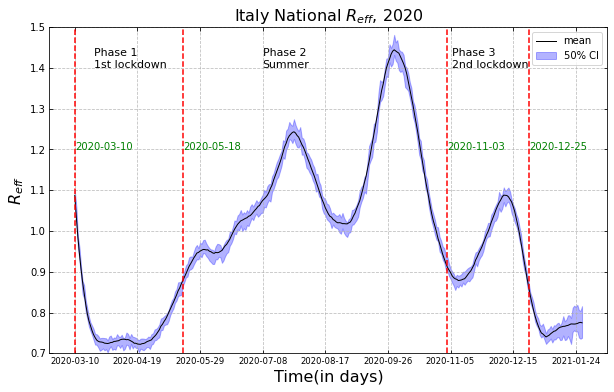

In [6]:
def get_mobdates(Rt_startdate, Rt_enddate):
    dt_format_Rtstart = datetime.strptime(Rt_startdate, '%Y-%m-%d')
    dt_format_Rtend = datetime.strptime(Rt_enddate, '%Y-%m-%d')

    dt_format_regstart = dt_format_Rtstart - timedelta(days=15)
    dt_format_regend = dt_format_Rtend - timedelta(days=15)


    reg_startdate = dt_format_regstart.strftime("%Y-%m-%d") # get it in string
    reg_enddate = dt_format_regend.strftime("%Y-%m-%d") # get it in string
    return reg_startdate, reg_enddate


#for i in regions[:-1]:
#df_r=df[df['denominazione_regione'] == 'Piemonte'] 
y=df_r['mean']
x=df_r['data']
#fig, ax = plt.subplots(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.plot(x,y,linewidth=1,color='black',label='mean')
#plt.fill_between(x, df_r['lower_90'], df_r['upper_90'], color='b', alpha=.6,label='10% CI')
plt.fill_between(x, df_r['lower_50'], df_r['upper_50'], color='b', alpha=.3,label='50% CI') 

# aesthetics and shit
plt.ylabel('$R_{eff}$',size=16)
plt.xlabel("Time(in days)",size=16)
plt.title('Italy National $R_{eff}$, 2020',size=16)
plt.xticks(x[::40],size=8.5)
plt.legend(loc='best')
plt.ylim([0.7,1.5])

plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.8,which='both')

#regions


#Rt_startdate1 = '2020-03-25'
#Rt_enddate1 = '2020-06-02'
reg_startdate1 = '2020-03-10'
reg_enddate1 =  '2020-05-18'     #get_mobdates(Rt_startdate1,Rt_enddate1)

#Rt_startdate2 = '2020-06-02'
#Rt_enddate2 = '2020-11-18'
#reg_startdate2, reg_enddate2 = get_mobdates(Rt_startdate2,Rt_enddate2)
reg_startdate2='2020-05-18'
reg_enddate2 ='2020-11-03'# get_mobdates(Rt_startdate2,Rt_enddate2)

#Rt_startdate3 = '2020-11-18'
#Rt_enddate3 = '2021-01-09'
#reg_startdate3, reg_enddate3 = get_mobdates(Rt_startdate3,Rt_enddate3)
reg_startdate3='2020-11-03'
reg_enddate3 = '2020-12-25'#get_mobdates(Rt_startdate3,Rt_enddate3)


#plt.axvline(x=Rt_startdate1,color='green',linestyle='--')
#plt.axvline(x=Rt_enddate1,color='green',linestyle='--')
#plt.axvline(x=Rt_enddate2,color='green',linestyle='--')
#plt.axvline(x=Rt_enddate3,color='green',linestyle='--')

#plt.text(x=Rt_startdate1,y=1.2,s=Rt_startdate1,color='green',)
#plt.text(x=Rt_enddate1,y=1.2,s=Rt_enddate1,color='green')
#plt.text(x=Rt_enddate2,y=1.2,s=Rt_enddate2,color='green')
#plt.text(x=Rt_enddate3,y=1.2,s= Rt_enddate3,color='green')

plt.text(x=reg_startdate1,y=1.2,s=reg_startdate1,color='green',)
plt.text(x=reg_enddate1,y=1.2,s=reg_enddate1,color='green')
plt.text(x=reg_enddate2,y=1.2,s=reg_enddate2,color='green')
plt.text(x=reg_enddate3,y=1.2,s= reg_enddate3,color='green')

plt.text(x='2020-03-22',y=1.4,s="Phase 1\n1st lockdown",color='black',size=11)
plt.text(x='2020-07-08',y=1.4,s="Phase 2\nSummer",color='black',size=11)
plt.text(x='2020-11-06',y=1.4,s="Phase 3\n2nd lockdown",color='black',size=11)


plt.axvline(x=reg_startdate1,color='red',linestyle='--')
plt.axvline(x=reg_enddate1,color='red',linestyle='--')
plt.axvline(x=reg_enddate2,color='red',linestyle='--')
plt.axvline(x=reg_enddate3,color='red',linestyle='--')
plt.savefig("Italy_Rt.png")
plt.show()

In [113]:
new_regions

['Piemonte', 'Lombardia', 'Veneto', 'Friuli Venezia Giulia']

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(16, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3)#, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
new_regions = [regions_list[0],regions_list[2],regions_list[3],regions_list[4]]
for b,i in enumerate(new_regions):
    reg_mob = df_m[df_m['sub_region_1']==i] 
    reg_Rt = df[df['denominazione_regione']==i] 
    reg_Rt = reg_Rt[reg_Rt['data'].between('2020-03-01','2021-01-15')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2021-01-15')] 

    idx1 = pd.Index(reg_Rt['data'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_Rt = reg_Rt[reg_Rt.data != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_Rt = reg_Rt.reset_index()
    reg_mob = reg_mob.reset_index()
    
    Rt_startdate1 = '2020-03-10'
    Rt_enddate1 = '2020-05-18'
    reg_Rt1 = reg_Rt[reg_Rt['data'].between(Rt_startdate1,Rt_enddate1)]
    reg_Rt1 = reg_Rt1.reset_index()

    ndays_selected1 = len(reg_Rt1)

    dt_format_incstart1 = datetime.strptime(Rt_startdate1, '%Y-%m-%d')
    dt_format_regstart1 = dt_format_incstart1 - timedelta(days=0)
    reg_startdate1 = dt_format_regstart1.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate1)
    reg_startIndex1 = reg_mob.date[reg_mob.date == reg_startdate1].index[0]
    reg_endIndex1 = reg_startIndex1 + ndays_selected1

    reg_mob1 = reg_mob.iloc[reg_startIndex1:reg_endIndex1, :]
    reg_mob1.reset_index()
    
    Rt_startdate2 = '2020-05-18'
    Rt_enddate2 = '2020-11-03'
    reg_Rt2 = reg_Rt[reg_Rt['data'].between(Rt_startdate2,Rt_enddate2)]
    reg_Rt2 = reg_Rt2.reset_index()

    ndays_selected2 = len(reg_Rt2)

    dt_format_incstaRt2 = datetime.strptime(Rt_startdate2, '%Y-%m-%d')
    dt_format_regstaRt2 = dt_format_incstaRt2 - timedelta(days=0)
    reg_startdate2 = dt_format_regstaRt2.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate2)
    reg_startIndex2 = reg_mob.date[reg_mob.date == reg_startdate2].index[0]
    reg_endIndex2 = reg_startIndex2 + ndays_selected2

    reg_mob2 = reg_mob.iloc[reg_startIndex2:reg_endIndex2, :]
    reg_mob2.reset_index()
    
    Rt_startdate3 = '2020-11-03'
    Rt_enddate3 = '2020-12-25'
    reg_Rt3= reg_Rt[reg_Rt['data'].between(Rt_startdate3,Rt_enddate3)]
    reg_Rt3= reg_Rt3.reset_index()

    ndays_selected3 = len(reg_Rt3)

    dt_format_incstaRt3= datetime.strptime(Rt_startdate3, '%Y-%m-%d')
    dt_format_regstaRt3= dt_format_incstaRt3- timedelta(days=0)
    reg_startdate3 = dt_format_regstaRt3.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate3)
    reg_startIndex3 = reg_mob.date[reg_mob.date == reg_startdate3].index[0]
    reg_endIndex3 = reg_startIndex3 + ndays_selected3

    reg_mob3 = reg_mob.iloc[reg_startIndex3:reg_endIndex3, :]
    reg_mob3.reset_index()
    
    
    x1 = np.array(reg_mob1['transit_stations_percent_change_from_baseline'])
    x2 = np.array(reg_mob2['transit_stations_percent_change_from_baseline'])
    x3 = np.array(reg_mob3['transit_stations_percent_change_from_baseline'])
    y1 = np.array(reg_Rt1['mean'])
    y2 = np.array(reg_Rt2['mean'])
    y3 = np.array(reg_Rt3['mean'])
    
    # loess fit
    x = np.concatenate((x1, x2, x3))
    y = np.concatenate((y1, y2, y3))
    
    x, y = zip(*sorted(zip(list(x), list(y))))
    
    l = loess(x,y)
    l.fit()
    pred = l.predict(x, stderror=True)
    conf = pred.confidence()

    lowess = pred.values
    ll = conf.lower
    ul = conf.upper

    #axs[b].plot(x, y, '+')
    axs[b].plot(x, lowess,'--',linewidth=2.5,color='red',zorder=2)
    axs[b].fill_between(x,ll,ul,alpha=.33,zorder=2)
    
    axs[b].scatter(x1[1:-2],y1[1:-2],s=60,c=range(len(y1[1:-2])),marker="s",edgecolor='black', linewidth=1,cmap='Reds')
    axs[b].scatter(x2[:-2],y2[:-2],s=60,c=range(len(y2[:-2])),marker="v",edgecolor='black', linewidth=1,cmap='Blues')
    axs[b].scatter(x3[:-2],y3[:-2],s=60,c=range(len(y3[:-2])),marker="o",edgecolor='black', linewidth=1,cmap='Greens')
    axs[b].set_xlabel('Transit mobility',size=16)
    axs[b].set_ylabel('$R_{eff}$',size=17)
    axs[b].set_title(i,size=20) 

    axs[b].scatter([],[],marker="s",edgecolor='black',label="1st lockdown",color='red')
    axs[b].scatter([],[],marker="v",edgecolor='black',label="Summer",color='blue')
    axs[b].scatter([],[],marker="o",edgecolor='black',label="2nd lockdown",color='green')
    
    axs[b].scatter(x1[0],y1[0],marker='*',s=250,c='red',zorder=2)
    axs[b].scatter(x1[-1],y1[-1],marker='*',s=250,c='blue',zorder=2)
    axs[b].scatter(x2[-1],y2[-1],marker='*',s=250,c='magenta',zorder=2)
    axs[b].scatter(x3[-1],y3[-1],marker='*',s=250,c='green',zorder=2)
    
     
    
    #leg = axs[b].get_legend()
   # pop_a = mpatches.Patch(color='darkred', label='1st lockdown')
   # pop_b = mpatches.Patch(color='darkblue', label='Summer')
   # pop_c = mpatches.Patch(color='green', label='2nd lockdown')
   # axs[b].legend(handles=[pop_a,pop_b,pop_c])
    #pop_a = axs[b].scatter([],[],color='darkred',marker='s', label='1st lockdown')
    #pop_b = axs[b].scatter([],[],color='darkblue',marker='v', label='Summer')
    #pop_c = axs[b].scatter([],[],color='green',marker='o', label='2nd lockdown')
    
    axs[b].legend(loc='best',prop={'size': 13})
    axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    axs[b].grid(linestyle='--',alpha=0.5,which='both')
#plt.savefig("4Regions_RtvsMob.png")

    

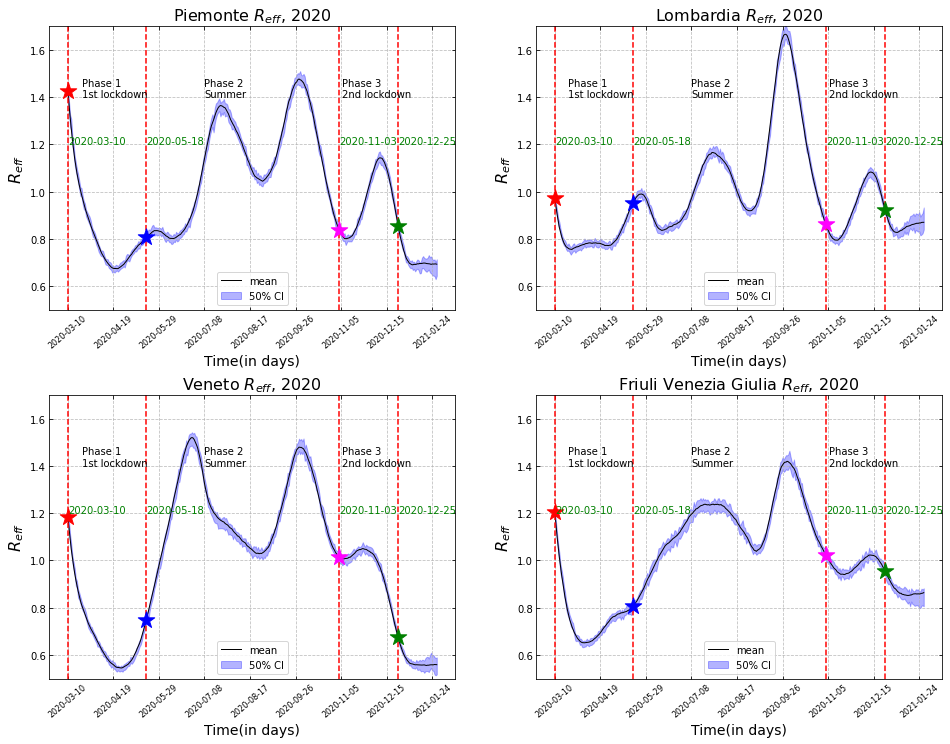

In [9]:

fig, axs = plt.subplots(2,2, figsize=(16, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3)#, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
new_regions = [regions_list[0],regions_list[2],regions_list[3],regions_list[4]]

for b,i in enumerate(new_regions):
    
    df_r=df[df['denominazione_regione'] == i]
    df_r=df_r[df_r['data'].between("2020-03-10","2021-1-15")]
    
    y=np.array(df_r['mean'])
    x=np.array(df_r['data'])
    #axs[b].figure(figsize=(10,6))
    axs[b].plot(x,y,linewidth=1,color='black',label='mean')
    #axs[b].fill_between(x, df_r['lower_90'], df_r['upper_90'], color='b', alpha=.6,label='10% CI')
    axs[b].fill_between(x, df_r['lower_50'], df_r['upper_50'], color='b', alpha=.3,label='50% CI') 
    
    
   
    #regions

    reg_startdate1 = '2020-03-10'
    reg_enddate1 =  '2020-05-18'     #get_mobdates(Rt_startdate1,Rt_enddate1)

    reg_startdate2='2020-05-18'
    reg_enddate2 ='2020-11-03'# get_mobdates(Rt_startdate2,Rt_enddate2)

    reg_startdate3='2020-11-03'
    reg_enddate3 = '2020-12-25'#get_mobdates(Rt_startdate3,Rt_enddate3)
    
    axs[b].scatter(reg_startdate1,y[list(x).index(reg_startdate1)],marker='*',s=300,c='red',zorder=3)
    axs[b].scatter(reg_enddate1,y[list(x).index(reg_enddate1)],marker='*',s=300,c='blue',zorder=3)
    axs[b].scatter(reg_enddate2,y[list(x).index(reg_enddate2)],marker='*',s=300,c='magenta',zorder=3)
    axs[b].scatter(reg_enddate3,y[list(x).index(reg_enddate3)],marker='*',s=300,c='green',zorder=3)
    
    


    axs[b].text(x=reg_startdate1,y=1.2,s=reg_startdate1,color='green',size=10)
    axs[b].text(x=reg_enddate1,y=1.2,s=reg_enddate1,color='green',size=10)
    axs[b].text(x=reg_enddate2,y=1.2,s=reg_enddate2,color='green',size=10)
    axs[b].text(x=reg_enddate3,y=1.2,s= reg_enddate3,color='green',size=10)

    axs[b].text(x='2020-03-22',y=1.4,s="Phase 1\n1st lockdown",color='black',size=10)
    axs[b].text(x='2020-07-08',y=1.4,s="Phase 2\nSummer",color='black',size=10)
    axs[b].text(x='2020-11-06',y=1.4,s="Phase 3\n2nd lockdown",color='black',size=10)


    axs[b].axvline(x=reg_startdate1,color='red',linestyle='--')
    axs[b].axvline(x=reg_enddate1,color='red',linestyle='--')
    axs[b].axvline(x=reg_enddate2,color='red',linestyle='--')
    axs[b].axvline(x=reg_enddate3,color='red',linestyle='--')
    
      # aesthetics and shit
    axs[b].set_ylabel('$R_{eff}$',size=16)
    axs[b].set_xlabel("Time(in days)",size=14)
    axs[b].set_title('%s $R_{eff}$, 2020'%i,size=16)
    axs[b].set_xticks(x[::40])
    axs[b].set_xticklabels(x[::40],fontsize=8,rotation=40)
    axs[b].legend(loc='best')
    axs[b].set_ylim([0.5,1.7])

    axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    axs[b].grid(linestyle='--',alpha=0.8,which='both')

plt.savefig("4Regions_RtvsTime.png")

    

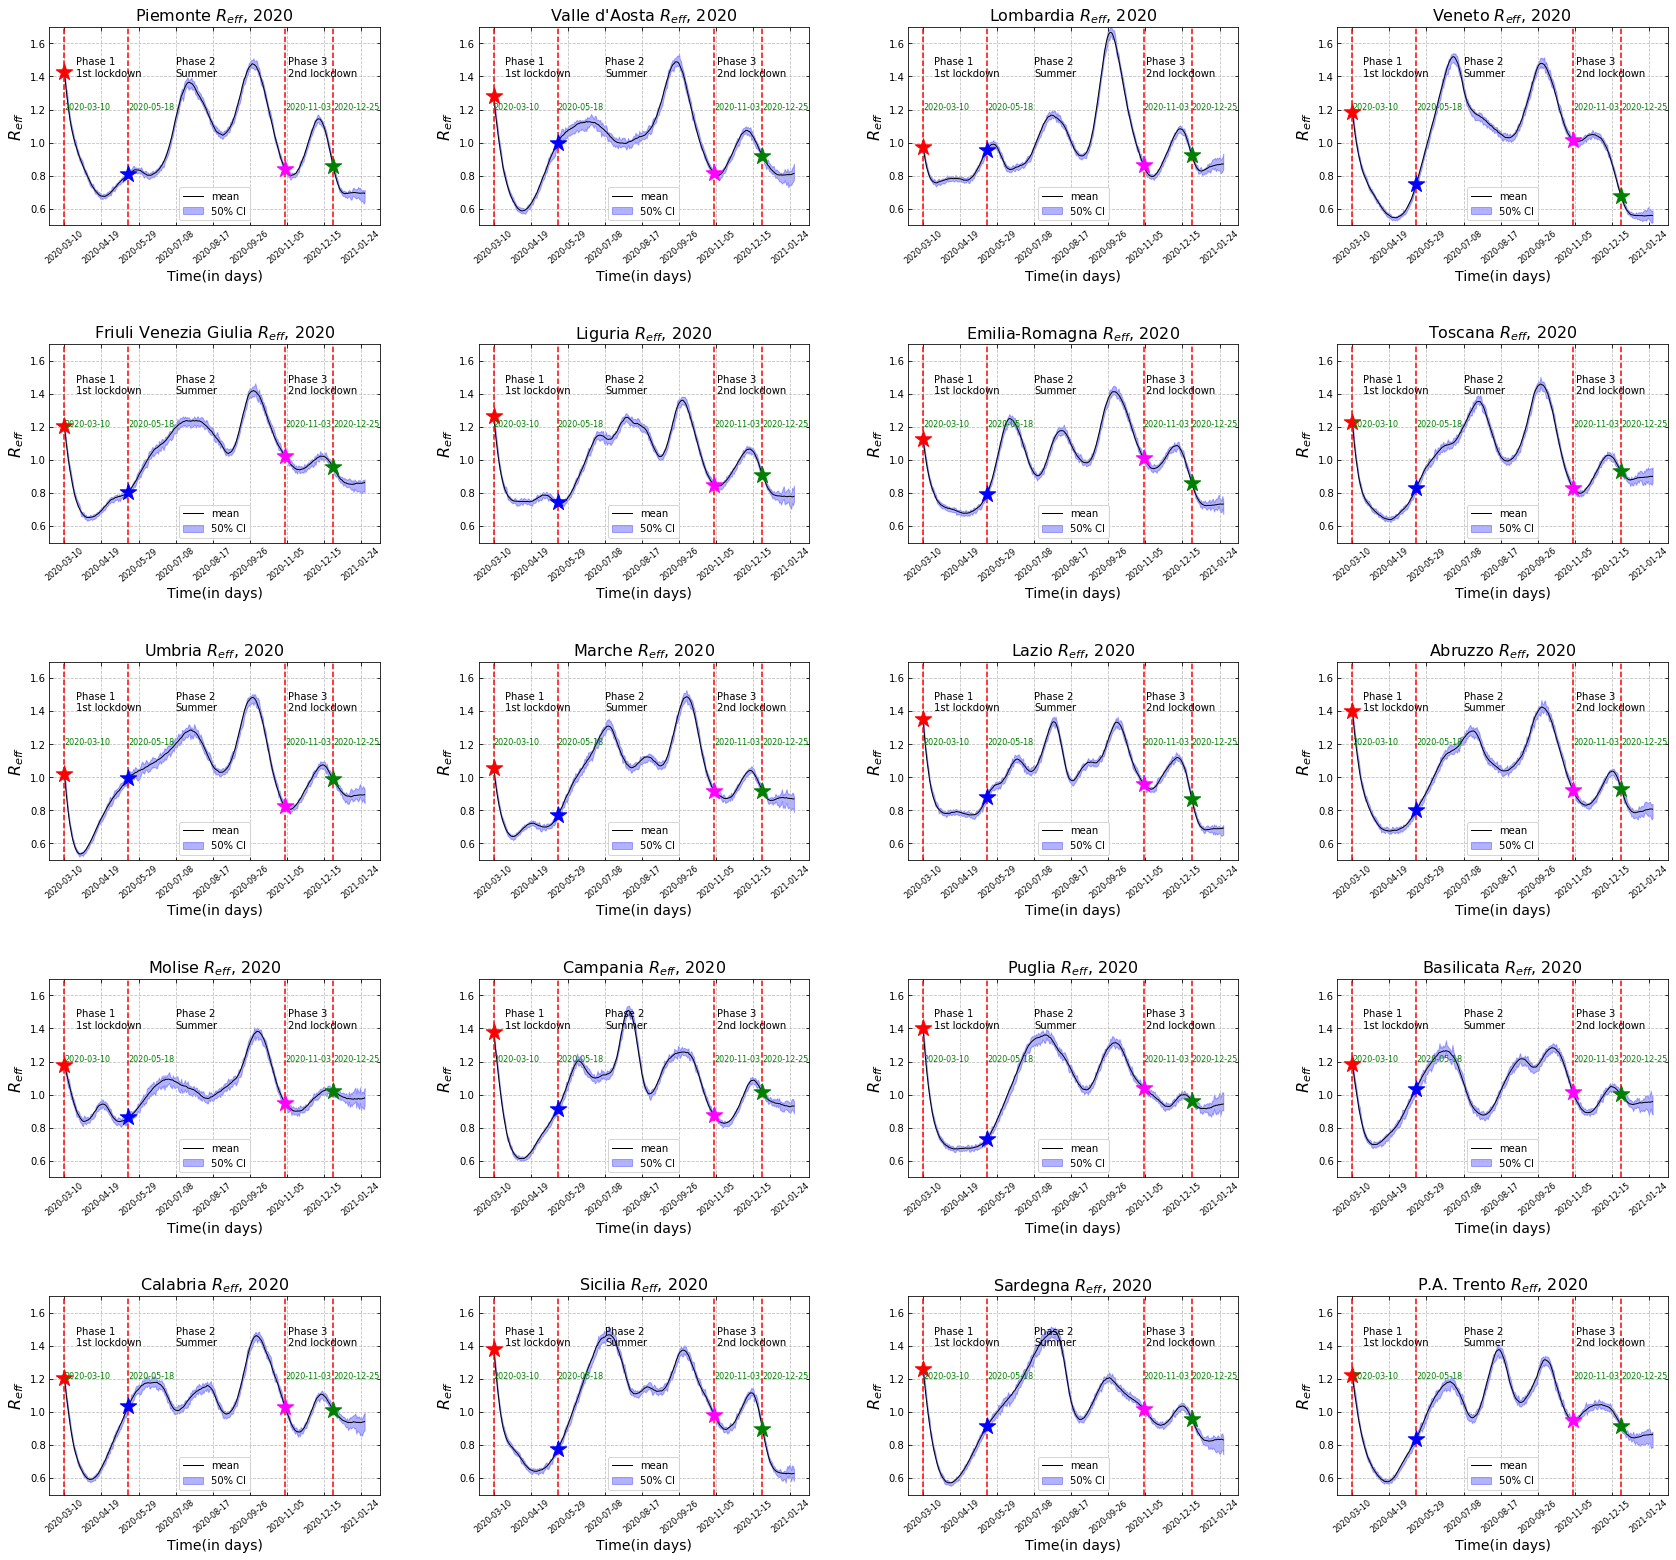

In [10]:
fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
#new_regions = [regions_list[0],regions_list[2],regions_list[3],regions_list[4]]

for b,i in enumerate(regions_list):
    
    df_r=df[df['denominazione_regione'] == i]
    df_r=df_r[df_r['data'].between("2020-03-10","2021-1-15")]
    
    y=np.array(df_r['mean'])
    x=np.array(df_r['data'])
    #axs[b].figure(figsize=(10,6))
    axs[b].plot(x,y,linewidth=1,color='black',label='mean')
    #axs[b].fill_between(x, df_r['lower_90'], df_r['upper_90'], color='b', alpha=.6,label='10% CI')
    axs[b].fill_between(x, df_r['lower_50'], df_r['upper_50'], color='b', alpha=.3,label='50% CI') 
    
    
   
    #regions

    reg_startdate1 = '2020-03-10'
    reg_enddate1 =  '2020-05-18'     #get_mobdates(Rt_startdate1,Rt_enddate1)

    reg_startdate2='2020-05-18'
    reg_enddate2 ='2020-11-03'# get_mobdates(Rt_startdate2,Rt_enddate2)

    reg_startdate3='2020-11-03'
    reg_enddate3 = '2020-12-25'#get_mobdates(Rt_startdate3,Rt_enddate3)
    
    axs[b].scatter(reg_startdate1,y[list(x).index(reg_startdate1)],marker='*',s=300,c='red',zorder=3)
    axs[b].scatter(reg_enddate1,y[list(x).index(reg_enddate1)],marker='*',s=300,c='blue',zorder=3)
    axs[b].scatter(reg_enddate2,y[list(x).index(reg_enddate2)],marker='*',s=300,c='magenta',zorder=3)
    axs[b].scatter(reg_enddate3,y[list(x).index(reg_enddate3)],marker='*',s=300,c='green',zorder=3)
    
    


    axs[b].text(x=reg_startdate1,y=1.2,s=reg_startdate1,color='green',size=8)
    axs[b].text(x=reg_enddate1,y=1.2,s=reg_enddate1,color='green',size=8)
    axs[b].text(x=reg_enddate2,y=1.2,s=reg_enddate2,color='green',size=8)
    axs[b].text(x=reg_enddate3,y=1.2,s= reg_enddate3,color='green',size=8)

    axs[b].text(x='2020-03-22',y=1.4,s="Phase 1\n1st lockdown",color='black',size=10)
    axs[b].text(x='2020-07-08',y=1.4,s="Phase 2\nSummer",color='black',size=10)
    axs[b].text(x='2020-11-06',y=1.4,s="Phase 3\n2nd lockdown",color='black',size=10)


    axs[b].axvline(x=reg_startdate1,color='red',linestyle='--')
    axs[b].axvline(x=reg_enddate1,color='red',linestyle='--')
    axs[b].axvline(x=reg_enddate2,color='red',linestyle='--')
    axs[b].axvline(x=reg_enddate3,color='red',linestyle='--')
    
      # aesthetics and shit
    axs[b].set_ylabel('$R_{eff}$',size=16)
    axs[b].set_xlabel("Time(in days)",size=14)
    axs[b].set_title('%s $R_{eff}$, 2020'%i,size=16)
    axs[b].set_xticks(x[::40])
    axs[b].set_xticklabels(x[::40],fontsize=8,rotation=40)
    axs[b].legend(loc='best')
    axs[b].set_ylim([0.5,1.7])

    axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    axs[b].grid(linestyle='--',alpha=0.8,which='both')

plt.savefig("AllRegions_RtvsTime.png")

    

In [8]:
reg_enddate3

'2020-12-25'

## Import Google's mobility dataset

In [9]:
data_m = '2020_IT_Region_Mobility_Report.csv'
data_table_m = pd.read_csv(data_m,sep=',')
df_m = pd.DataFrame(data_table_m)

In [10]:
regions_m = list(df_m["sub_region_1"].dropna().unique())
regions_m

['Abruzzo',
 'Aosta',
 'Apulia',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli-Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardy',
 'Marche',
 'Molise',
 'Piedmont',
 'Sardinia',
 'Sicily',
 'Trentino-South Tyrol',
 'Tuscany',
 'Umbria',
 'Veneto']

In [11]:
regions = regions[:-1]
regions

['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto',
 'Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana',
 'Umbria',
 'Marche',
 'Lazio',
 'Abruzzo',
 'Molise',
 'Campania',
 'Puglia',
 'Basilicata',
 'Calabria',
 'Sicilia',
 'Sardegna',
 'P.A. Bolzano',
 'P.A. Trento']

In [12]:
replace_dict = {"Friuli-Venezia Giulia":"Friuli Venezia Giulia",'Lombardy':'Lombardia','Trentino-South Tyrol':'P.A. Trento',
               'Piedmont':'Piemonte','Aosta':"Valle d'Aosta",'Sicily': 'Sicilia','Apulia':'Puglia','Tuscany':'Toscana',
               'Sardinia':'Sardegna'}

In [13]:
for i in range(len(replace_dict.keys())):
    df_m["sub_region_1"].replace(list(replace_dict.keys())[i],list(replace_dict.values())[i], inplace=True)

In [14]:
#df_r=df[df['denominazione_regione'] == 'Veneto']
#y=df_r['mean']
#x=df_r['data']
#fig, ax = plt.subplots()
#ax.plot(x,y,linewidth=0.5,color='black')
#ax.fill_between(x, df_r['lower_90'], df_r['upper_90'], color='b', alpha=.5,label='CI (10%)')
#ax.fill_between(x, df_r['lower_50'], df_r['upper_50'], color='b', alpha=.1,label='CI (50%)') 
#ax.legend(loc=1)

## Filter mobilty data

In [15]:
remove_province_data = (np.array(df_m['sub_region_2'].isnull()))
df_m = df_m[remove_province_data]

In [16]:
# Now we drop the columns that we don't require for mobility analysis.
df_m =df_m.drop(['country_region_code', 'country_region', 'sub_region_2','metro_area','iso_3166_2_code',
        'census_fips_code'], axis=1)

In [17]:
df_m = df_m.dropna()

In [18]:
df # THIS IS Rt DATASET

denominazione_regione        data      mean    median   mode  lower_90  \
0                 Piemonte  2020-02-14  2.323301  2.309820  2.285  2.281083   
1                 Piemonte  2020-02-15  2.321924  2.323052  2.255  2.318101   
2                 Piemonte  2020-02-16  2.318967  2.322357  2.255  2.240227   
3                 Piemonte  2020-02-17  2.309656  2.311911  2.235  2.299711   
4                 Piemonte  2020-02-18  2.310172  2.306112  2.365  2.361202   
...                    ...         ...       ...       ...    ...       ...   
7622                 Italy  2021-01-24  0.772105  0.775897  0.795  0.753486   
7623                 Italy  2021-01-25  0.773042  0.772261  0.805  0.800369   
7624                 Italy  2021-01-26  0.775042  0.769387  0.765  0.759157   
7625                 Italy  2021-01-27  0.775858  0.776230  0.785  0.781185   
7626                 Italy  2021-01-28  0.774832  0.776491  0.775  0.770743   

      upper_90  lower_50  upper_50  
0     2.299696  2.185166  2.365531  
1     2.343174  2.250805  2.431910  
2     2.260645  2.255381  2.434664  
3     2.322228  2.224034  2.377818  
4     2.384731  2.211893  2.367963  
...        ...       ...       ...  
7622  0.760172  0.753486  0.813900  
7623  0.807994  0.753653  0.819040  
7624  0.767825  0.738678  0.805981  
7625  0.790717  0.735698  0.804172  
7626  0.779037  0.737800  0.815682  

[7627 rows x 9 columns]

In [19]:
df_m

sub_region_1        date  \
329        Abruzzo  2020-02-15   
330        Abruzzo  2020-02-16   
331        Abruzzo  2020-02-17   
332        Abruzzo  2020-02-18   
333        Abruzzo  2020-02-19   
...            ...         ...   
39472       Veneto  2021-01-04   
39473       Veneto  2021-01-05   
39474       Veneto  2021-01-06   
39475       Veneto  2021-01-07   
39476       Veneto  2021-01-08   

       retail_and_recreation_percent_change_from_baseline  \
329                                                  2.0    
330                                                  2.0    
331                                                 -1.0    
332                                                  1.0    
333                                                 -4.0    
...                                                  ...    
39472                                              -32.0    
39473                                              -57.0    
39474                                              -78.0    
39475                                              -26.0    
39476                                              -26.0    

       grocery_and_pharmacy_percent_change_from_baseline  \
329                                                  2.0   
330                                                  8.0   
331                                                  2.0   
332                                                  2.0   
333                                                 -1.0   
...                                                  ...   
39472                                               16.0   
39473                                               -2.0   
39474                                              -62.0   
39475                                                1.0   
39476                                                4.0   

       parks_percent_change_from_baseline  \
329                                  36.0   
330                                  47.0   
331                                  11.0   
332                                  22.0   
333                                 -12.0   
...                                   ...   
39472                               -20.0   
39473                               -48.0   
39474                               -48.0   
39475                               -22.0   
39476                               -10.0   

       transit_stations_percent_change_from_baseline  \
329                                              9.0   
330                                             26.0   
331                                              7.0   
332                                              5.0   
333                                              1.0   
...                                              ...   
39472                                          -52.0   
39473                                          -64.0   
39474                                          -75.0   
39475                                          -46.0   
39476                                          -44.0   

       workplaces_percent_change_from_baseline  \
329                                        0.0   
330                                       -1.0   
331                                        1.0   
332                                        2.0   
333                                        1.0   
...                                        ...   
39472                                    -49.0   
39473                                    -54.0   
39474                                    -83.0   
39475                                    -27.0   
39476                                    -27.0   

       residential_percent_change_from_baseline  
329                                        -1.0  
330                                        -2.0  
331                                        -1.0  
332                                        -1.0  
333                                         0.0  
...                         

In [20]:
from datetime import datetime
from datetime import timedelta

In [8]:
mobility_list = ['retail_and_recreation_percent_change_from_baseline',
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline'] 


regions_list= ['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto',
 'Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana',
 'Umbria',
 'Marche',
 'Lazio',
 'Abruzzo',
 'Molise',
 'Campania',
 'Puglia',
 'Basilicata',
 'Calabria',
 'Sicilia',
 'Sardegna',
# 'P.A. Bolzano',
 'P.A. Trento']  # WE HAVE TO DELETE TRENTINO REGION FOR THE REASON DISCUSSED

## Shifted scatter (20 days lag)

In [22]:
#import matplotlib.pyplot as plt
#import numpy as np

# Generate data...
#x = np.array([1,2,3])
#y = np.array([3,2,1])

#plt.scatter(x, y, c=y, s=500, cmap='inferno')
#plt.show()

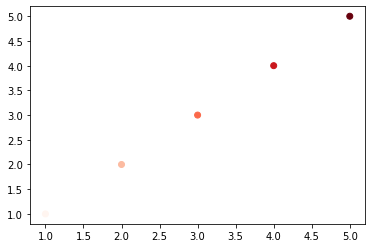

In [95]:
q=[1,2,3,4,5]
r=[1,2,3,4,5]
plt.scatter(q,r,c=r,cmap='Reds')

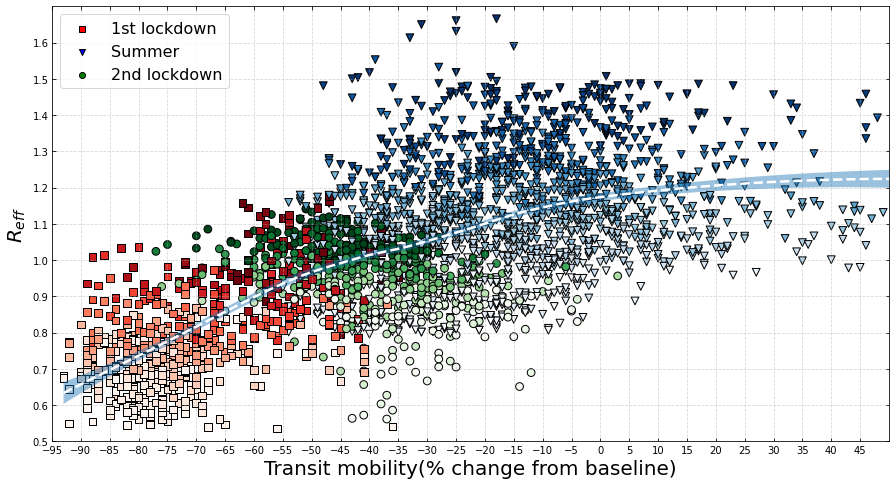

In [23]:
#fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.6, wspace=0.3)
#import matplotlib.patches as mpatches
#axs = axs.ravel()
marker_list = ['o', 's', '*', 'v', '^', 'D', 'h', 'x', '+', '8', 'p', '<', '>', 'd', 'H','P','X','1','2','3']
plt.figure(figsize=(15,8))

x = []
y=[]
for b,i in enumerate(regions_list):
    reg_mob = df_m[df_m['sub_region_1']==i] 
    reg_Rt = df[df['denominazione_regione']==i] 
    reg_Rt = reg_Rt[reg_Rt['data'].between('2020-03-01','2021-01-15')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2021-01-15')] 

    idx1 = pd.Index(reg_Rt['data'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_Rt = reg_Rt[reg_Rt.data != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_Rt = reg_Rt.reset_index()
    reg_mob = reg_mob.reset_index()
    
    Rt_startdate1 = '2020-03-25'
    Rt_enddate1 = '2020-06-02'
    reg_Rt1 = reg_Rt[reg_Rt['data'].between(Rt_startdate1,Rt_enddate1)]
    reg_Rt1 = reg_Rt1.reset_index()

    ndays_selected1 = len(reg_Rt1)

    dt_format_incstart1 = datetime.strptime(Rt_startdate1, '%Y-%m-%d')
    dt_format_regstart1 = dt_format_incstart1 - timedelta(days=15)
    reg_startdate1 = dt_format_regstart1.strftime("%Y-%m-%d") # get it in string
    #print(reg_startdate1)
    reg_startIndex1 = reg_mob.date[reg_mob.date == reg_startdate1].index[0]
    reg_endIndex1 = reg_startIndex1 + ndays_selected1

    reg_mob1 = reg_mob.iloc[reg_startIndex1:reg_endIndex1, :]
    reg_mob1.reset_index()
    
    Rt_startdate2 = '2020-06-02'
    Rt_enddate2 = '2020-11-18'
    reg_Rt2 = reg_Rt[reg_Rt['data'].between(Rt_startdate2,Rt_enddate2)]
    reg_Rt2 = reg_Rt2.reset_index()

    ndays_selected2 = len(reg_Rt2)

    dt_format_incstaRt2 = datetime.strptime(Rt_startdate2, '%Y-%m-%d')
    dt_format_regstaRt2 = dt_format_incstaRt2 - timedelta(days=15)
    reg_startdate2 = dt_format_regstaRt2.strftime("%Y-%m-%d") # get it in string
    #print(reg_startdate2)
    reg_startIndex2 = reg_mob.date[reg_mob.date == reg_startdate2].index[0]
    reg_endIndex2 = reg_startIndex2 + ndays_selected2

    reg_mob2 = reg_mob.iloc[reg_startIndex2:reg_endIndex2, :]
    reg_mob2.reset_index()
    
    # 3rd lockdown
    Rt_startdate3 = '2020-11-18'
    Rt_enddate3 = '2021-01-09'
    reg_Rt3= reg_Rt[reg_Rt['data'].between(Rt_startdate3,Rt_enddate3)]
    reg_Rt3= reg_Rt3.reset_index()

    ndays_selected3 = len(reg_Rt3)

    dt_format_incstaRt3= datetime.strptime(Rt_startdate3, '%Y-%m-%d')
    dt_format_regstaRt3= dt_format_incstaRt3- timedelta(days=15)
    reg_startdate3 = dt_format_regstaRt3.strftime("%Y-%m-%d") # get it in string
    #print(reg_startdate3)
    reg_startIndex3 = reg_mob.date[reg_mob.date == reg_startdate3].index[0]
    reg_endIndex3 = reg_startIndex3 + ndays_selected3

    reg_mob3 = reg_mob.iloc[reg_startIndex3:reg_endIndex3, :]
    reg_mob3.reset_index()
        
    # use this to skip the points from being plotted.
    point=2 
    
    x1 = reg_mob1['transit_stations_percent_change_from_baseline'][0::point]
    x2 = reg_mob2['transit_stations_percent_change_from_baseline'][0::point]
    x3 = reg_mob3['transit_stations_percent_change_from_baseline'][0::point]
    y1 = reg_Rt1['mean'][0::point]
    y2 = reg_Rt2['mean'][0::point]
    y3 = reg_Rt3['mean'][0::point]
    
    # concatenate all data for loess fit
    x += list(x1)+list(x2)+list(x3)
    y += list(y1)+list(y2)+list(y3)
    #x = np.concatenate((x, x1, x2, x3))
    #y = np.concatenate((x, y1, y2, y3))
       
    #axs[b].plot(x, y, '+')
    #plt.plot(x, lowess,'--',linewidth=2.5,color='red',zorder=2)
    #plt.fill_between(x,ll,ul,alpha=.33,zorder=2)
    
    
    plt.scatter(x1,y1,s=60,c=y1,edgecolor='black',marker='s',#
                linewidth=1,cmap='Reds',zorder=1)
    
    plt.scatter(x2,y2,s=60,c=y2,edgecolor='black',marker='v',#,marker=marker_list[b]
                linewidth=1,cmap='Blues',zorder=1)
    
    plt.scatter(x3,y3,s=60,c=y3,edgecolor='black',marker='o',#,marker=marker_list[b]
                linewidth=1,cmap='Greens',zorder=1)
    
    #plt.xlabel('transit stations mobility',size=16)
    #axs[b].set_ylabel('Rt',size=17)
    #axs[b].set_title(i,size=20) 
    #axs[b].legend(loc=0,scatterpoints=1,facecolor = None) 
    #pop_a = mpatches.Patch(color='darkred',marker='s', label='1st lockdown')
    #pop_b = mpatches.Patch(color='darkblue',marker='v', label='Summer')
    #pop_c = mpatches.Patch(color='green',marker='o', label='2nd lockdown')
    
    #axs[b].legend(loc='best')
    #leg.legendHandles[0].set_color('red')
    #leg.legendHandles[1].set_color('yellow')
    
#loess fit
x, y = zip(*sorted(zip(x, y)))
    
l = loess(x,y)
l.fit()
pred = l.predict(x, stderror=True)
conf = pred.confidence()

lowess = pred.values
ll = conf.lower
ul = conf.upper

#axs[b].plot(x, y, '+')
plt.plot(x, lowess,'--',linewidth=2.5,color='white',zorder=2)
plt.fill_between(x,ll,ul,alpha=.45,zorder=2)


# aesthetics
#plt.scatter([],[],marker='s',label='1st lockdown',color='darkred')
#plt.scatter([],[],marker='v',label='Summer',color='darkblue')
#plt.scatter([],[],marker='o',label='2nd lockdown',color='green')

plt.xlim([-95,50])
plt.ylim([0.5,1.7])


plt.yticks(np.arange(0.5,1.7,0.1))
plt.xticks(range(-95,50,5))

plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5,which='both')
plt.scatter([],[],marker="s",edgecolor='black',label="1st lockdown",color='red')
plt.scatter([],[],marker="v",edgecolor='black',label="Summer",color='blue')
plt.scatter([],[],marker="o",edgecolor='black',label="2nd lockdown",color='green')
    
plt.legend(loc='upper left',prop={'size': 16})

plt.xlabel("Transit mobility(% change from baseline)",size=20)
plt.ylabel("$R_{eff}$",size=20)
plt.show()    

3rd LOCKDOWN:
mobility data: from 2020-11-03 to 2020-12-25
incidence data: from '2020-11-17' to '2021-01-08'

SUMMER:
mobility data: from 2020-05-18 to 2020-11-03
incidence data: from '2020-06-01' to '2020-11-17'

1st LOCKDOWN:
mobility data: from 2020-03-10 to 2020-05-18
incidence data: from '2020-03-24' to '2020-06-01'

In [24]:
import scipy.interpolate

def smooth(x, y, xgrid):
    samples = np.random.choice(len(x), 50, replace=True)
    y_s = y[samples]
    x_s = x[samples]
    y_sm = sm_lowess(y_s,x_s, frac=1./5., it=5,
                     return_sorted = False)
    
    x_s = x_s[~np.isnan(y_sm)]
    y_sm = y_sm[~np.isnan(y_sm)]
    
    # regularly sample it onto the grid
    y_grid = scipy.interpolate.interp1d(x_s, y_sm, 
                                        fill_value='extrapolate')(xgrid)
    return y_grid



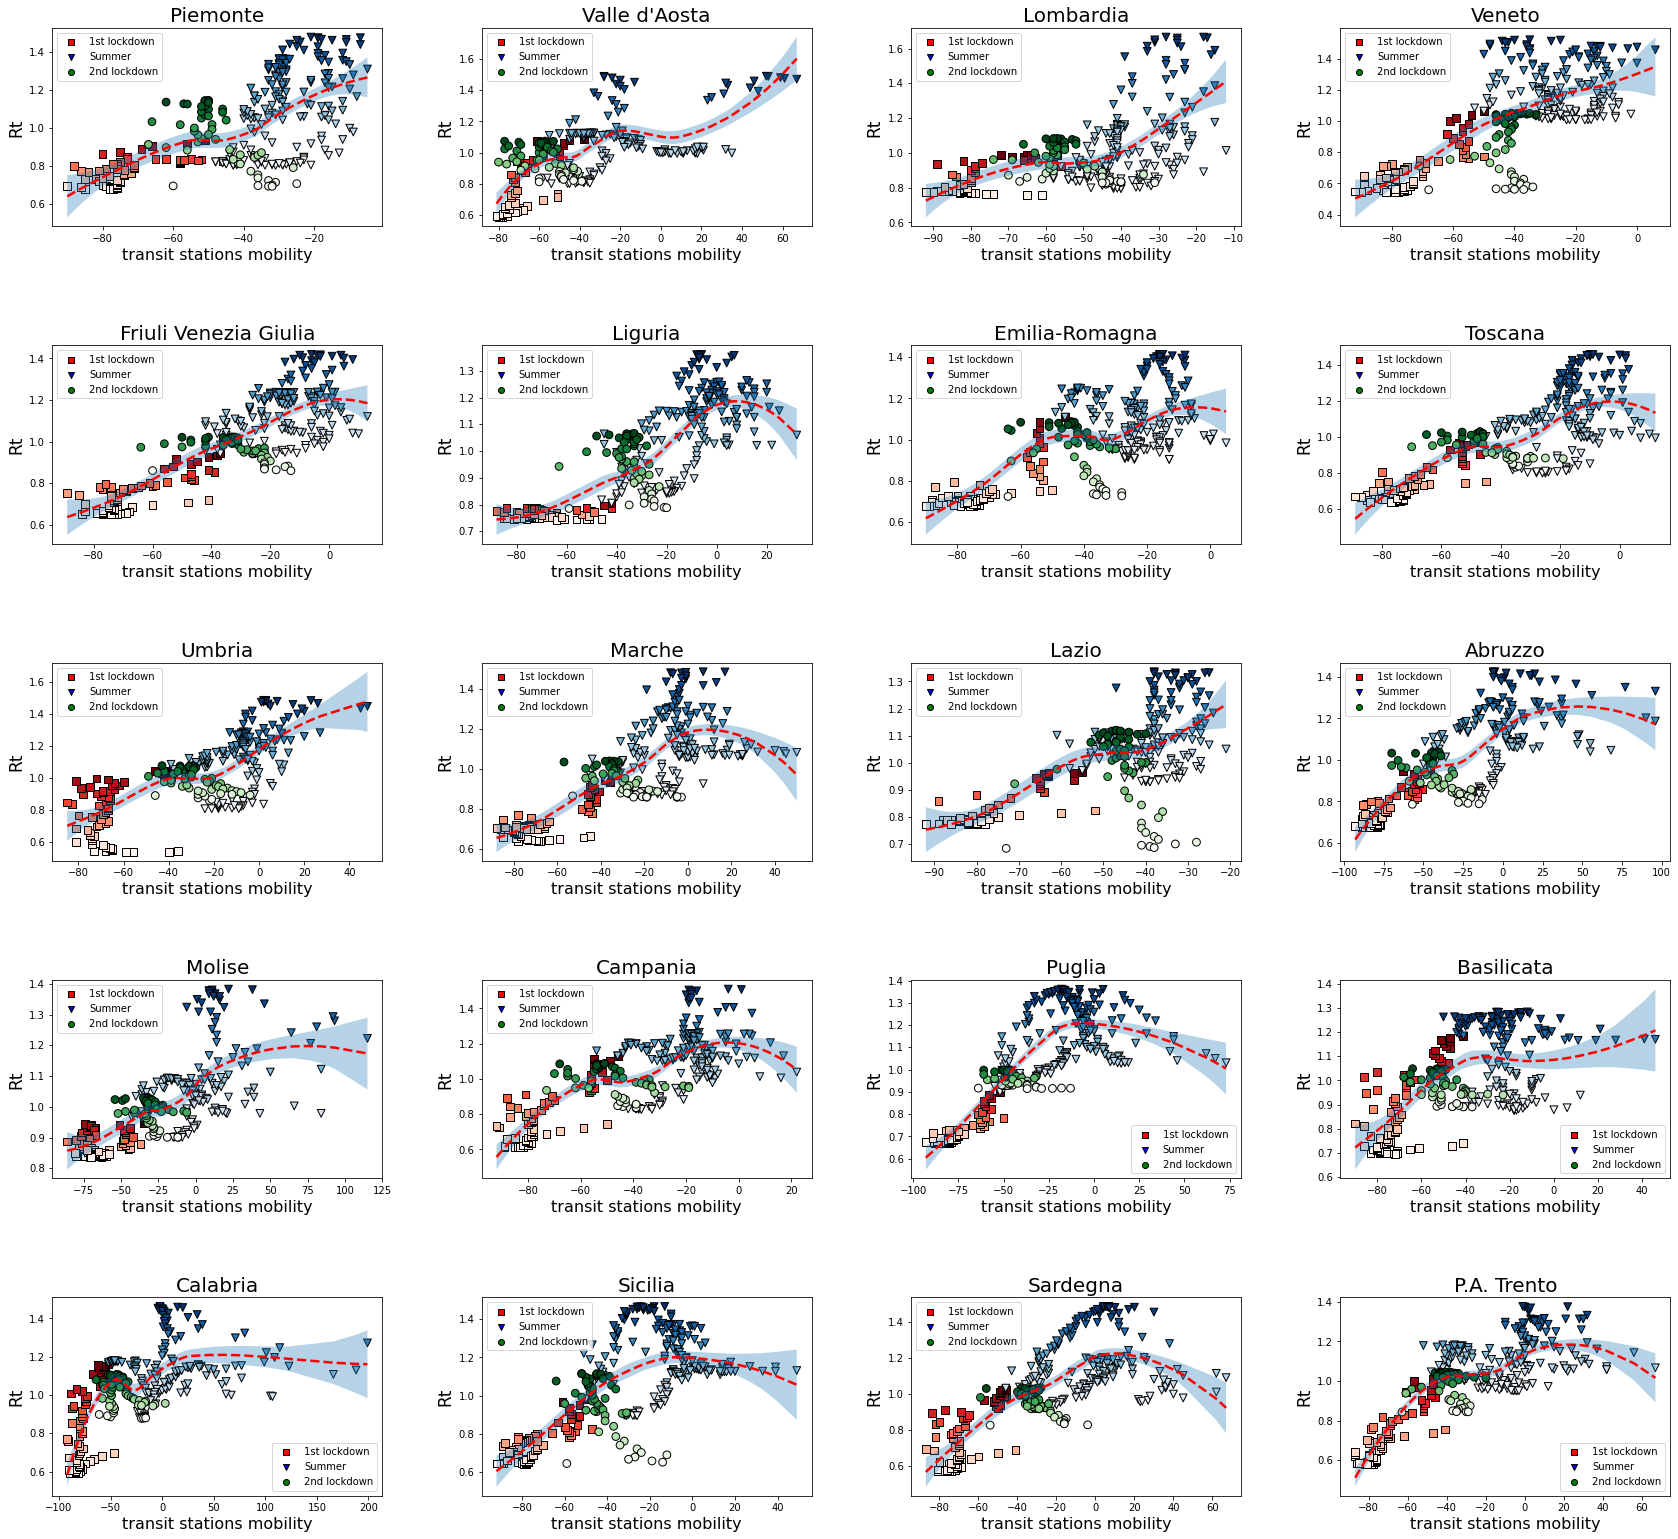

In [25]:
fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
for b,i in enumerate(regions_list[:-1]):
    reg_mob = df_m[df_m['sub_region_1']==i] 
    reg_Rt = df[df['denominazione_regione']==i] 
    reg_Rt = reg_Rt[reg_Rt['data'].between('2020-03-01','2021-01-15')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2021-01-15')] 

    idx1 = pd.Index(reg_Rt['data'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_Rt = reg_Rt[reg_Rt.data != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_Rt = reg_Rt.reset_index()
    reg_mob = reg_mob.reset_index()
    
    Rt_startdate1 = '2020-03-25'
    Rt_enddate1 = '2020-06-02'
    reg_Rt1 = reg_Rt[reg_Rt['data'].between(Rt_startdate1,Rt_enddate1)]
    reg_Rt1 = reg_Rt1.reset_index()

    ndays_selected1 = len(reg_Rt1)

    dt_format_incstart1 = datetime.strptime(Rt_startdate1, '%Y-%m-%d')
    dt_format_regstart1 = dt_format_incstart1 - timedelta(days=15)
    reg_startdate1 = dt_format_regstart1.strftime("%Y-%m-%d") # get it in string
    #print(reg_startdate1)
    reg_startIndex1 = reg_mob.date[reg_mob.date == reg_startdate1].index[0]
    reg_endIndex1 = reg_startIndex1 + ndays_selected1

    reg_mob1 = reg_mob.iloc[reg_startIndex1:reg_endIndex1, :]
    reg_mob1.reset_index()
    
    Rt_startdate2 = '2020-06-02'
    Rt_enddate2 = '2020-11-18'
    reg_Rt2 = reg_Rt[reg_Rt['data'].between(Rt_startdate2,Rt_enddate2)]
    reg_Rt2 = reg_Rt2.reset_index()

    ndays_selected2 = len(reg_Rt2)

    dt_format_incstaRt2 = datetime.strptime(Rt_startdate2, '%Y-%m-%d')
    dt_format_regstaRt2 = dt_format_incstaRt2 - timedelta(days=15)
    reg_startdate2 = dt_format_regstaRt2.strftime("%Y-%m-%d") # get it in string
    #print(reg_startdate2)
    reg_startIndex2 = reg_mob.date[reg_mob.date == reg_startdate2].index[0]
    reg_endIndex2 = reg_startIndex2 + ndays_selected2

    reg_mob2 = reg_mob.iloc[reg_startIndex2:reg_endIndex2, :]
    reg_mob2.reset_index()
    
    # 3rd lockdown
    Rt_startdate3 = '2020-11-18'
    Rt_enddate3 = '2021-01-09'
    reg_Rt3= reg_Rt[reg_Rt['data'].between(Rt_startdate3,Rt_enddate3)]
    reg_Rt3= reg_Rt3.reset_index()

    ndays_selected3 = len(reg_Rt3)

    dt_format_incstaRt3= datetime.strptime(Rt_startdate3, '%Y-%m-%d')
    dt_format_regstaRt3= dt_format_incstaRt3- timedelta(days=15)
    reg_startdate3 = dt_format_regstaRt3.strftime("%Y-%m-%d") # get it in string
    #print(reg_startdate3)
    reg_startIndex3 = reg_mob.date[reg_mob.date == reg_startdate3].index[0]
    reg_endIndex3 = reg_startIndex3 + ndays_selected3

    reg_mob3 = reg_mob.iloc[reg_startIndex3:reg_endIndex3, :]
    reg_mob3.reset_index()
    
    
    x1 = reg_mob1['transit_stations_percent_change_from_baseline']
    x2 = reg_mob2['transit_stations_percent_change_from_baseline']
    x3 = reg_mob3['transit_stations_percent_change_from_baseline']
    y1 = reg_Rt1['mean']
    y2 = reg_Rt2['mean']
    y3 = reg_Rt3['mean']
    
    
    # loess fit
    x = np.concatenate((x1, x2, x3))
    y = np.concatenate((y1, y2, y3))
    
    x, y = zip(*sorted(zip(list(x), list(y))))
    
    l = loess(x,y)
    l.fit()
    pred = l.predict(x, stderror=True)
    conf = pred.confidence()

    lowess = pred.values
    ll = conf.lower
    ul = conf.upper

    #axs[b].plot(x, y, '+')
    axs[b].plot(x, lowess,'--',linewidth=2.5,color='red',zorder=2)
    axs[b].fill_between(x,ll,ul,alpha=.33,zorder=2)
    
    
    
    axs[b].scatter(x1,y1,s=60,c=y1,marker="s",edgecolor='black', linewidth=1,cmap='Reds',zorder=1)
    axs[b].scatter(x2,y2,s=60,c=y2,marker="v",edgecolor='black', linewidth=1,cmap='Blues',zorder=1)
    axs[b].scatter(x3,y3,s=60,c=y3,marker="o",edgecolor='black', linewidth=1,cmap='Greens',zorder=1)
    
    axs[b].set_xlabel('transit stations mobility',size=16)
    axs[b].set_ylabel('Rt',size=17)
    axs[b].set_title(i,size=20) 
    #axs[b].legend(loc=0,scatterpoints=1,facecolor = None) 
    #pop_a = mpatches.Patch(color='darkred',marker='s', label='1st lockdown')
    #pop_b = mpatches.Patch(color='darkblue',marker='v', label='Summer')
    #pop_c = mpatches.Patch(color='green',marker='o', label='2nd lockdown')
    axs[b].scatter([],[],marker="s",edgecolor='black',label="1st lockdown",color='red')
    axs[b].scatter([],[],marker="v",edgecolor='black',label="Summer",color='blue')
    axs[b].scatter([],[],marker="o",edgecolor='black',label="2nd lockdown",color='green')
    
    axs[b].legend(loc='best')
    #leg.legendHandles[0].set_color('red')
    #leg.legendHandles[1].set_color('yellow')
    

## NON shifted scatter

2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03


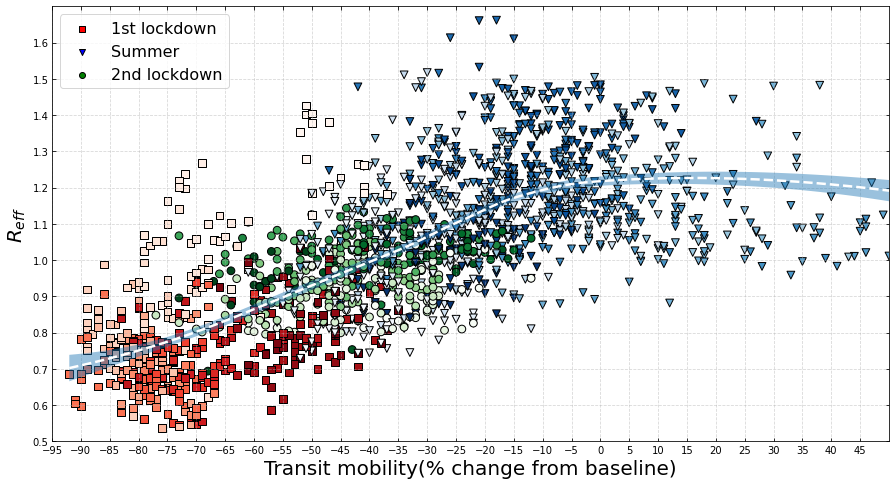

In [152]:
#fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.6, wspace=0.3)
#import matplotlib.patches as mpatches
#axs = axs.ravel()
marker_list = ['o', 's', '*', 'v', '^', 'D', 'h', 'x', '+', '8', 'p', '<', '>', 'd', 'H','P','X','1','2','3']
plt.figure(figsize=(15,8))

x = []
y=[]
for b,i in enumerate(regions_list[:-1]):
    reg_mob = df_m[df_m['sub_region_1']==i] 
    reg_Rt = df[df['denominazione_regione']==i] 
    reg_Rt = reg_Rt[reg_Rt['data'].between('2020-03-01','2021-01-15')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2021-01-15')] 

    idx1 = pd.Index(reg_Rt['data'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_Rt = reg_Rt[reg_Rt.data != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_Rt = reg_Rt.reset_index()
    reg_mob = reg_mob.reset_index()
    
    Rt_startdate1 = '2020-03-10'
    Rt_enddate1 = '2020-05-18'
    reg_Rt1 = reg_Rt[reg_Rt['data'].between(Rt_startdate1,Rt_enddate1)]
    reg_Rt1 = reg_Rt1.reset_index()

    ndays_selected1 = len(reg_Rt1)

    dt_format_incstart1 = datetime.strptime(Rt_startdate1, '%Y-%m-%d')
    dt_format_regstart1 = dt_format_incstart1 - timedelta(days=0)
    reg_startdate1 = dt_format_regstart1.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate1)
    reg_startIndex1 = reg_mob.date[reg_mob.date == reg_startdate1].index[0]
    reg_endIndex1 = reg_startIndex1 + ndays_selected1

    reg_mob1 = reg_mob.iloc[reg_startIndex1:reg_endIndex1, :]
    reg_mob1.reset_index()
    
    Rt_startdate2 = '2020-05-18'
    Rt_enddate2 = '2020-11-03'
    reg_Rt2 = reg_Rt[reg_Rt['data'].between(Rt_startdate2,Rt_enddate2)]
    reg_Rt2 = reg_Rt2.reset_index()

    ndays_selected2 = len(reg_Rt2)

    dt_format_incstaRt2 = datetime.strptime(Rt_startdate2, '%Y-%m-%d')
    dt_format_regstaRt2 = dt_format_incstaRt2 - timedelta(days=0)
    reg_startdate2 = dt_format_regstaRt2.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate2)
    reg_startIndex2 = reg_mob.date[reg_mob.date == reg_startdate2].index[0]
    reg_endIndex2 = reg_startIndex2 + ndays_selected2

    reg_mob2 = reg_mob.iloc[reg_startIndex2:reg_endIndex2, :]
    reg_mob2.reset_index()
    
    Rt_startdate3 = '2020-11-03'
    Rt_enddate3 = '2020-12-25'
    reg_Rt3= reg_Rt[reg_Rt['data'].between(Rt_startdate3,Rt_enddate3)]
    reg_Rt3= reg_Rt3.reset_index()

    ndays_selected3 = len(reg_Rt3)

    dt_format_incstaRt3= datetime.strptime(Rt_startdate3, '%Y-%m-%d')
    dt_format_regstaRt3= dt_format_incstaRt3- timedelta(days=0)
    reg_startdate3 = dt_format_regstaRt3.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate3)
    reg_startIndex3 = reg_mob.date[reg_mob.date == reg_startdate3].index[0]
    reg_endIndex3 = reg_startIndex3 + ndays_selected3

    reg_mob3 = reg_mob.iloc[reg_startIndex3:reg_endIndex3, :]
    reg_mob3.reset_index()
        
    # use this to skip the points from being plotted.
    point=3 
    
    x1 = reg_mob1['transit_stations_percent_change_from_baseline'][0::point]
    x2 = reg_mob2['transit_stations_percent_change_from_baseline'][0::point]
    x3 = reg_mob3['transit_stations_percent_change_from_baseline'][0::point]
    y1 = reg_Rt1['mean'][0::point]
    y2 = reg_Rt2['mean'][0::point]
    y3 = reg_Rt3['mean'][0::point]
    
    # concatenate all data for loess fit
    x += list(x1)+list(x2)+list(x3)
    y += list(y1)+list(y2)+list(y3)
    #x = np.concatenate((x, x1, x2, x3))
    #y = np.concatenate((x, y1, y2, y3))
       
    #axs[b].plot(x, y, '+')
    #plt.plot(x, lowess,'--',linewidth=2.5,color='red',zorder=2)
    #plt.fill_between(x,ll,ul,alpha=.33,zorder=2)
    
    
    plt.scatter(x1,y1,s=60,c=range(len(y1)),edgecolor='black',marker='s',#
                linewidth=1,cmap='Reds',zorder=1)
    
    plt.scatter(x2,y2,s=60,c=range(len(y2)),edgecolor='black',marker='v',#,marker=marker_list[b]
                linewidth=1,cmap='Blues',zorder=1)
    
    plt.scatter(x3,y3,s=60,c=range(len(y3)),edgecolor='black',marker='o',#,marker=marker_list[b]
                linewidth=1,cmap='Greens',zorder=1)
    
    #plt.xlabel('transit stations mobility',size=16)
    #axs[b].set_ylabel('Rt',size=17)
    #axs[b].set_title(i,size=20) 
    #axs[b].legend(loc=0,scatterpoints=1,facecolor = None) 
    #pop_a = mpatches.Patch(color='darkred',marker='s', label='1st lockdown')
    #pop_b = mpatches.Patch(color='darkblue',marker='v', label='Summer')
    #pop_c = mpatches.Patch(color='green',marker='o', label='2nd lockdown')
    
    #axs[b].legend(loc='best')
    #leg.legendHandles[0].set_color('red')
    #leg.legendHandles[1].set_color('yellow')
    
#loess fit
x, y = zip(*sorted(zip(x, y)))
    
l = loess(x,y)
l.fit()
pred = l.predict(x, stderror=True)
conf = pred.confidence()

lowess = pred.values
ll = conf.lower
ul = conf.upper

#axs[b].plot(x, y, '+')
plt.plot(x, lowess,'--',linewidth=2.5,color='white',zorder=2)
plt.fill_between(x,ll,ul,alpha=.45,zorder=2)


# aesthetics
#plt.scatter([],[],marker='s',label='1st lockdown',color='darkred')
#plt.scatter([],[],marker='v',label='Summer',color='darkblue')
#plt.scatter([],[],marker='o',label='2nd lockdown',color='green')

plt.xlim([-95,50])
plt.ylim([0.5,1.7])


plt.yticks(np.arange(0.5,1.7,0.1))
plt.xticks(range(-95,50,5))

plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5,which='both')
plt.scatter([],[],marker="s",edgecolor='black',label="1st lockdown",color='red')
plt.scatter([],[],marker="v",edgecolor='black',label="Summer",color='blue')
plt.scatter([],[],marker="o",edgecolor='black',label="2nd lockdown",color='green')

plt.legend(loc='upper left',prop={'size': 16})

plt.xlabel("Transit mobility(% change from baseline)",size=20)
plt.ylabel("$R_{eff}$",size=20)
#plt.title("No shift")
plt.savefig("Noshift_RtvsMob.png")
plt.show()    

In [36]:
regions_list[0]

'Piemonte'

2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03


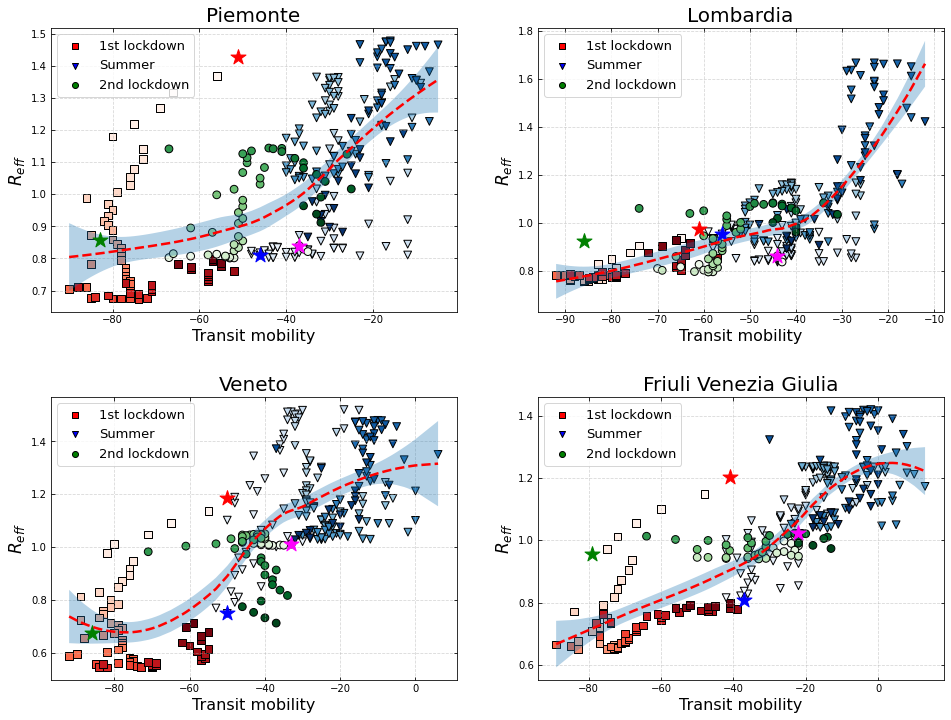

In [98]:
fig, axs = plt.subplots(2,2, figsize=(16, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3)#, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
new_regions = [regions_list[0],regions_list[2],regions_list[3],regions_list[4]]
for b,i in enumerate(new_regions):
    reg_mob = df_m[df_m['sub_region_1']==i] 
    reg_Rt = df[df['denominazione_regione']==i] 
    reg_Rt = reg_Rt[reg_Rt['data'].between('2020-03-01','2021-01-15')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2021-01-15')] 

    idx1 = pd.Index(reg_Rt['data'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_Rt = reg_Rt[reg_Rt.data != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_Rt = reg_Rt.reset_index()
    reg_mob = reg_mob.reset_index()
    
    Rt_startdate1 = '2020-03-10'
    Rt_enddate1 = '2020-05-18'
    reg_Rt1 = reg_Rt[reg_Rt['data'].between(Rt_startdate1,Rt_enddate1)]
    reg_Rt1 = reg_Rt1.reset_index()

    ndays_selected1 = len(reg_Rt1)

    dt_format_incstart1 = datetime.strptime(Rt_startdate1, '%Y-%m-%d')
    dt_format_regstart1 = dt_format_incstart1 - timedelta(days=0)
    reg_startdate1 = dt_format_regstart1.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate1)
    reg_startIndex1 = reg_mob.date[reg_mob.date == reg_startdate1].index[0]
    reg_endIndex1 = reg_startIndex1 + ndays_selected1

    reg_mob1 = reg_mob.iloc[reg_startIndex1:reg_endIndex1, :]
    reg_mob1.reset_index()
    
    Rt_startdate2 = '2020-05-18'
    Rt_enddate2 = '2020-11-03'
    reg_Rt2 = reg_Rt[reg_Rt['data'].between(Rt_startdate2,Rt_enddate2)]
    reg_Rt2 = reg_Rt2.reset_index()

    ndays_selected2 = len(reg_Rt2)

    dt_format_incstaRt2 = datetime.strptime(Rt_startdate2, '%Y-%m-%d')
    dt_format_regstaRt2 = dt_format_incstaRt2 - timedelta(days=0)
    reg_startdate2 = dt_format_regstaRt2.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate2)
    reg_startIndex2 = reg_mob.date[reg_mob.date == reg_startdate2].index[0]
    reg_endIndex2 = reg_startIndex2 + ndays_selected2

    reg_mob2 = reg_mob.iloc[reg_startIndex2:reg_endIndex2, :]
    reg_mob2.reset_index()
    
    Rt_startdate3 = '2020-11-03'
    Rt_enddate3 = '2020-12-25'
    reg_Rt3= reg_Rt[reg_Rt['data'].between(Rt_startdate3,Rt_enddate3)]
    reg_Rt3= reg_Rt3.reset_index()

    ndays_selected3 = len(reg_Rt3)

    dt_format_incstaRt3= datetime.strptime(Rt_startdate3, '%Y-%m-%d')
    dt_format_regstaRt3= dt_format_incstaRt3- timedelta(days=0)
    reg_startdate3 = dt_format_regstaRt3.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate3)
    reg_startIndex3 = reg_mob.date[reg_mob.date == reg_startdate3].index[0]
    reg_endIndex3 = reg_startIndex3 + ndays_selected3

    reg_mob3 = reg_mob.iloc[reg_startIndex3:reg_endIndex3, :]
    reg_mob3.reset_index()
    
    
    x1 = np.array(reg_mob1['transit_stations_percent_change_from_baseline'])
    x2 = np.array(reg_mob2['transit_stations_percent_change_from_baseline'])
    x3 = np.array(reg_mob3['transit_stations_percent_change_from_baseline'])
    y1 = np.array(reg_Rt1['mean'])
    y2 = np.array(reg_Rt2['mean'])
    y3 = np.array(reg_Rt3['mean'])
    
    # loess fit
    x = np.concatenate((x1, x2, x3))
    y = np.concatenate((y1, y2, y3))
    
    x, y = zip(*sorted(zip(list(x), list(y))))
    
    l = loess(x,y)
    l.fit()
    pred = l.predict(x, stderror=True)
    conf = pred.confidence()

    lowess = pred.values
    ll = conf.lower
    ul = conf.upper

    #axs[b].plot(x, y, '+')
    axs[b].plot(x, lowess,'--',linewidth=2.5,color='red',zorder=2)
    axs[b].fill_between(x,ll,ul,alpha=.33,zorder=2)
    
    axs[b].scatter(x1[1:-2],y1[1:-2],s=60,c=range(len(y1[1:-2])),marker="s",edgecolor='black', linewidth=1,cmap='Reds')
    axs[b].scatter(x2[:-2],y2[:-2],s=60,c=range(len(y2[:-2])),marker="v",edgecolor='black', linewidth=1,cmap='Blues')
    axs[b].scatter(x3[:-2],y3[:-2],s=60,c=range(len(y3[:-2])),marker="o",edgecolor='black', linewidth=1,cmap='Greens')
    axs[b].set_xlabel('Transit mobility',size=16)
    axs[b].set_ylabel('$R_{eff}$',size=17)
    axs[b].set_title(i,size=20) 

    axs[b].scatter([],[],marker="s",edgecolor='black',label="1st lockdown",color='red')
    axs[b].scatter([],[],marker="v",edgecolor='black',label="Summer",color='blue')
    axs[b].scatter([],[],marker="o",edgecolor='black',label="2nd lockdown",color='green')
    
    axs[b].scatter(x1[0],y1[0],marker='*',s=250,c='red',zorder=2)
    axs[b].scatter(x1[-1],y1[-1],marker='*',s=250,c='blue',zorder=2)
    axs[b].scatter(x2[-1],y2[-1],marker='*',s=250,c='magenta',zorder=2)
    axs[b].scatter(x3[-1],y3[-1],marker='*',s=250,c='green',zorder=2)
    
     
    
    #leg = axs[b].get_legend()
   # pop_a = mpatches.Patch(color='darkred', label='1st lockdown')
   # pop_b = mpatches.Patch(color='darkblue', label='Summer')
   # pop_c = mpatches.Patch(color='green', label='2nd lockdown')
   # axs[b].legend(handles=[pop_a,pop_b,pop_c])
    #pop_a = axs[b].scatter([],[],color='darkred',marker='s', label='1st lockdown')
    #pop_b = axs[b].scatter([],[],color='darkblue',marker='v', label='Summer')
    #pop_c = axs[b].scatter([],[],color='green',marker='o', label='2nd lockdown')
    
    axs[b].legend(loc='best',prop={'size': 13})
    axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    axs[b].grid(linestyle='--',alpha=0.5,which='both')
plt.savefig("4Regions_RtvsMob.png")

    

2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03
2020-03-10
2020-05-18
2020-11-03


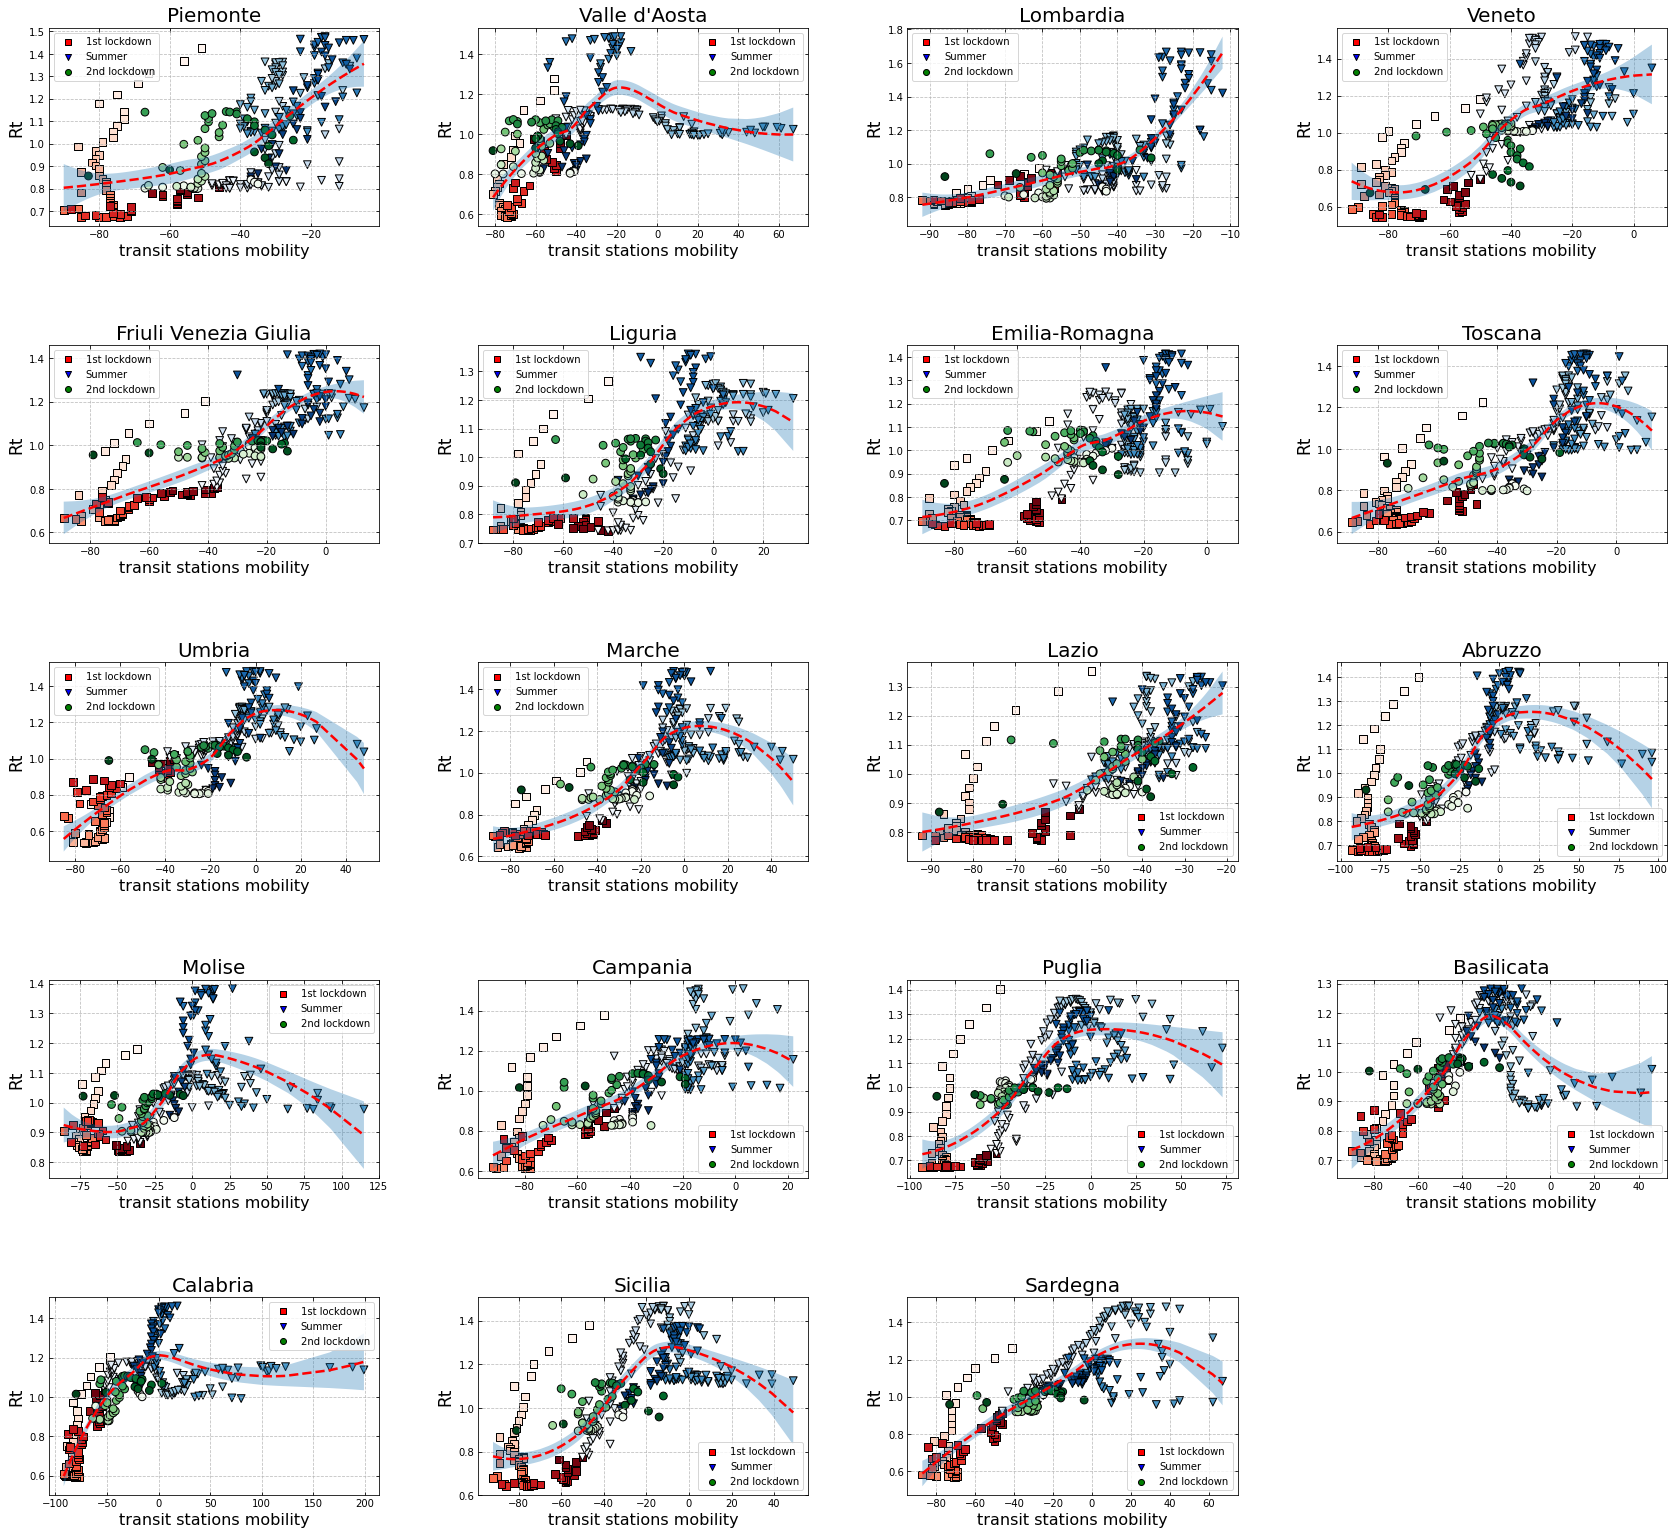

In [158]:
fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
for b,i in enumerate(regions_list[:-1]):
    reg_mob = df_m[df_m['sub_region_1']==i] 
    reg_Rt = df[df['denominazione_regione']==i] 
    reg_Rt = reg_Rt[reg_Rt['data'].between('2020-03-01','2021-01-15')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2021-01-15')] 

    idx1 = pd.Index(reg_Rt['data'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_Rt = reg_Rt[reg_Rt.data != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_Rt = reg_Rt.reset_index()
    reg_mob = reg_mob.reset_index()
    
    Rt_startdate1 = '2020-03-10'
    Rt_enddate1 = '2020-05-18'
    reg_Rt1 = reg_Rt[reg_Rt['data'].between(Rt_startdate1,Rt_enddate1)]
    reg_Rt1 = reg_Rt1.reset_index()

    ndays_selected1 = len(reg_Rt1)

    dt_format_incstart1 = datetime.strptime(Rt_startdate1, '%Y-%m-%d')
    dt_format_regstart1 = dt_format_incstart1 - timedelta(days=0)
    reg_startdate1 = dt_format_regstart1.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate1)
    reg_startIndex1 = reg_mob.date[reg_mob.date == reg_startdate1].index[0]
    reg_endIndex1 = reg_startIndex1 + ndays_selected1

    reg_mob1 = reg_mob.iloc[reg_startIndex1:reg_endIndex1, :]
    reg_mob1.reset_index()
    
    Rt_startdate2 = '2020-05-18'
    Rt_enddate2 = '2020-11-03'
    reg_Rt2 = reg_Rt[reg_Rt['data'].between(Rt_startdate2,Rt_enddate2)]
    reg_Rt2 = reg_Rt2.reset_index()

    ndays_selected2 = len(reg_Rt2)

    dt_format_incstaRt2 = datetime.strptime(Rt_startdate2, '%Y-%m-%d')
    dt_format_regstaRt2 = dt_format_incstaRt2 - timedelta(days=0)
    reg_startdate2 = dt_format_regstaRt2.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate2)
    reg_startIndex2 = reg_mob.date[reg_mob.date == reg_startdate2].index[0]
    reg_endIndex2 = reg_startIndex2 + ndays_selected2

    reg_mob2 = reg_mob.iloc[reg_startIndex2:reg_endIndex2, :]
    reg_mob2.reset_index()
    
    Rt_startdate3 = '2020-11-03'
    Rt_enddate3 = '2020-12-25'
    reg_Rt3= reg_Rt[reg_Rt['data'].between(Rt_startdate3,Rt_enddate3)]
    reg_Rt3= reg_Rt3.reset_index()

    ndays_selected3 = len(reg_Rt3)

    dt_format_incstaRt3= datetime.strptime(Rt_startdate3, '%Y-%m-%d')
    dt_format_regstaRt3= dt_format_incstaRt3- timedelta(days=0)
    reg_startdate3 = dt_format_regstaRt3.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate3)
    reg_startIndex3 = reg_mob.date[reg_mob.date == reg_startdate3].index[0]
    reg_endIndex3 = reg_startIndex3 + ndays_selected3

    reg_mob3 = reg_mob.iloc[reg_startIndex3:reg_endIndex3, :]
    reg_mob3.reset_index()
    
    
    x1 = reg_mob1['transit_stations_percent_change_from_baseline']
    x2 = reg_mob2['transit_stations_percent_change_from_baseline']
    x3 = reg_mob3['transit_stations_percent_change_from_baseline']
    y1 = reg_Rt1['mean']
    y2 = reg_Rt2['mean']
    y3 = reg_Rt3['mean']
    
    # loess fit
    x = np.concatenate((x1, x2, x3))
    y = np.concatenate((y1, y2, y3))
    
    x, y = zip(*sorted(zip(list(x), list(y))))
    
    l = loess(x,y)
    l.fit()
    pred = l.predict(x, stderror=True)
    conf = pred.confidence()

    lowess = pred.values
    ll = conf.lower
    ul = conf.upper

    #axs[b].plot(x, y, '+')
    axs[b].plot(x, lowess,'--',linewidth=2.5,color='red',zorder=2)
    axs[b].fill_between(x,ll,ul,alpha=.33,zorder=2)
    
    axs[b].scatter(x1,y1,s=60,c=range(len(y1)),marker="s",edgecolor='black', linewidth=1,cmap='Reds')
    axs[b].scatter(x2,y2,s=60,c=range(len(y2)),marker="v",edgecolor='black', linewidth=1,cmap='Blues')
    axs[b].scatter(x3,y3,s=60,c=range(len(y3)),marker="o",edgecolor='black', linewidth=1,cmap='Greens')
    axs[b].set_xlabel('transit stations mobility',size=16)
    axs[b].set_ylabel('Rt',size=17)
    axs[b].set_title(i,size=20) 
    
    axs[b].scatter([],[],marker="s",edgecolor='black',label="1st lockdown",color='red')
    axs[b].scatter([],[],marker="v",edgecolor='black',label="Summer",color='blue')
    axs[b].scatter([],[],marker="o",edgecolor='black',label="2nd lockdown",color='green')
    
    
    
    #leg = axs[b].get_legend()
   # pop_a = mpatches.Patch(color='darkred', label='1st lockdown')
   # pop_b = mpatches.Patch(color='darkblue', label='Summer')
   # pop_c = mpatches.Patch(color='green', label='2nd lockdown')
   # axs[b].legend(handles=[pop_a,pop_b,pop_c])
    #pop_a = axs[b].scatter([],[],color='darkred',marker='s', label='1st lockdown')
    #pop_b = axs[b].scatter([],[],color='darkblue',marker='v', label='Summer')
    #pop_c = axs[b].scatter([],[],color='green',marker='o', label='2nd lockdown')
    
    axs[b].legend(loc='best')
    axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    axs[b].grid(linestyle='--',alpha=0.8,which='both')

axs.flat[-1].set_visible(False) # remove frame of last axes
plt.savefig("Region_RtvsMob.png")

    

# Stop here.

### Shifted scatter (separate periods)

2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10


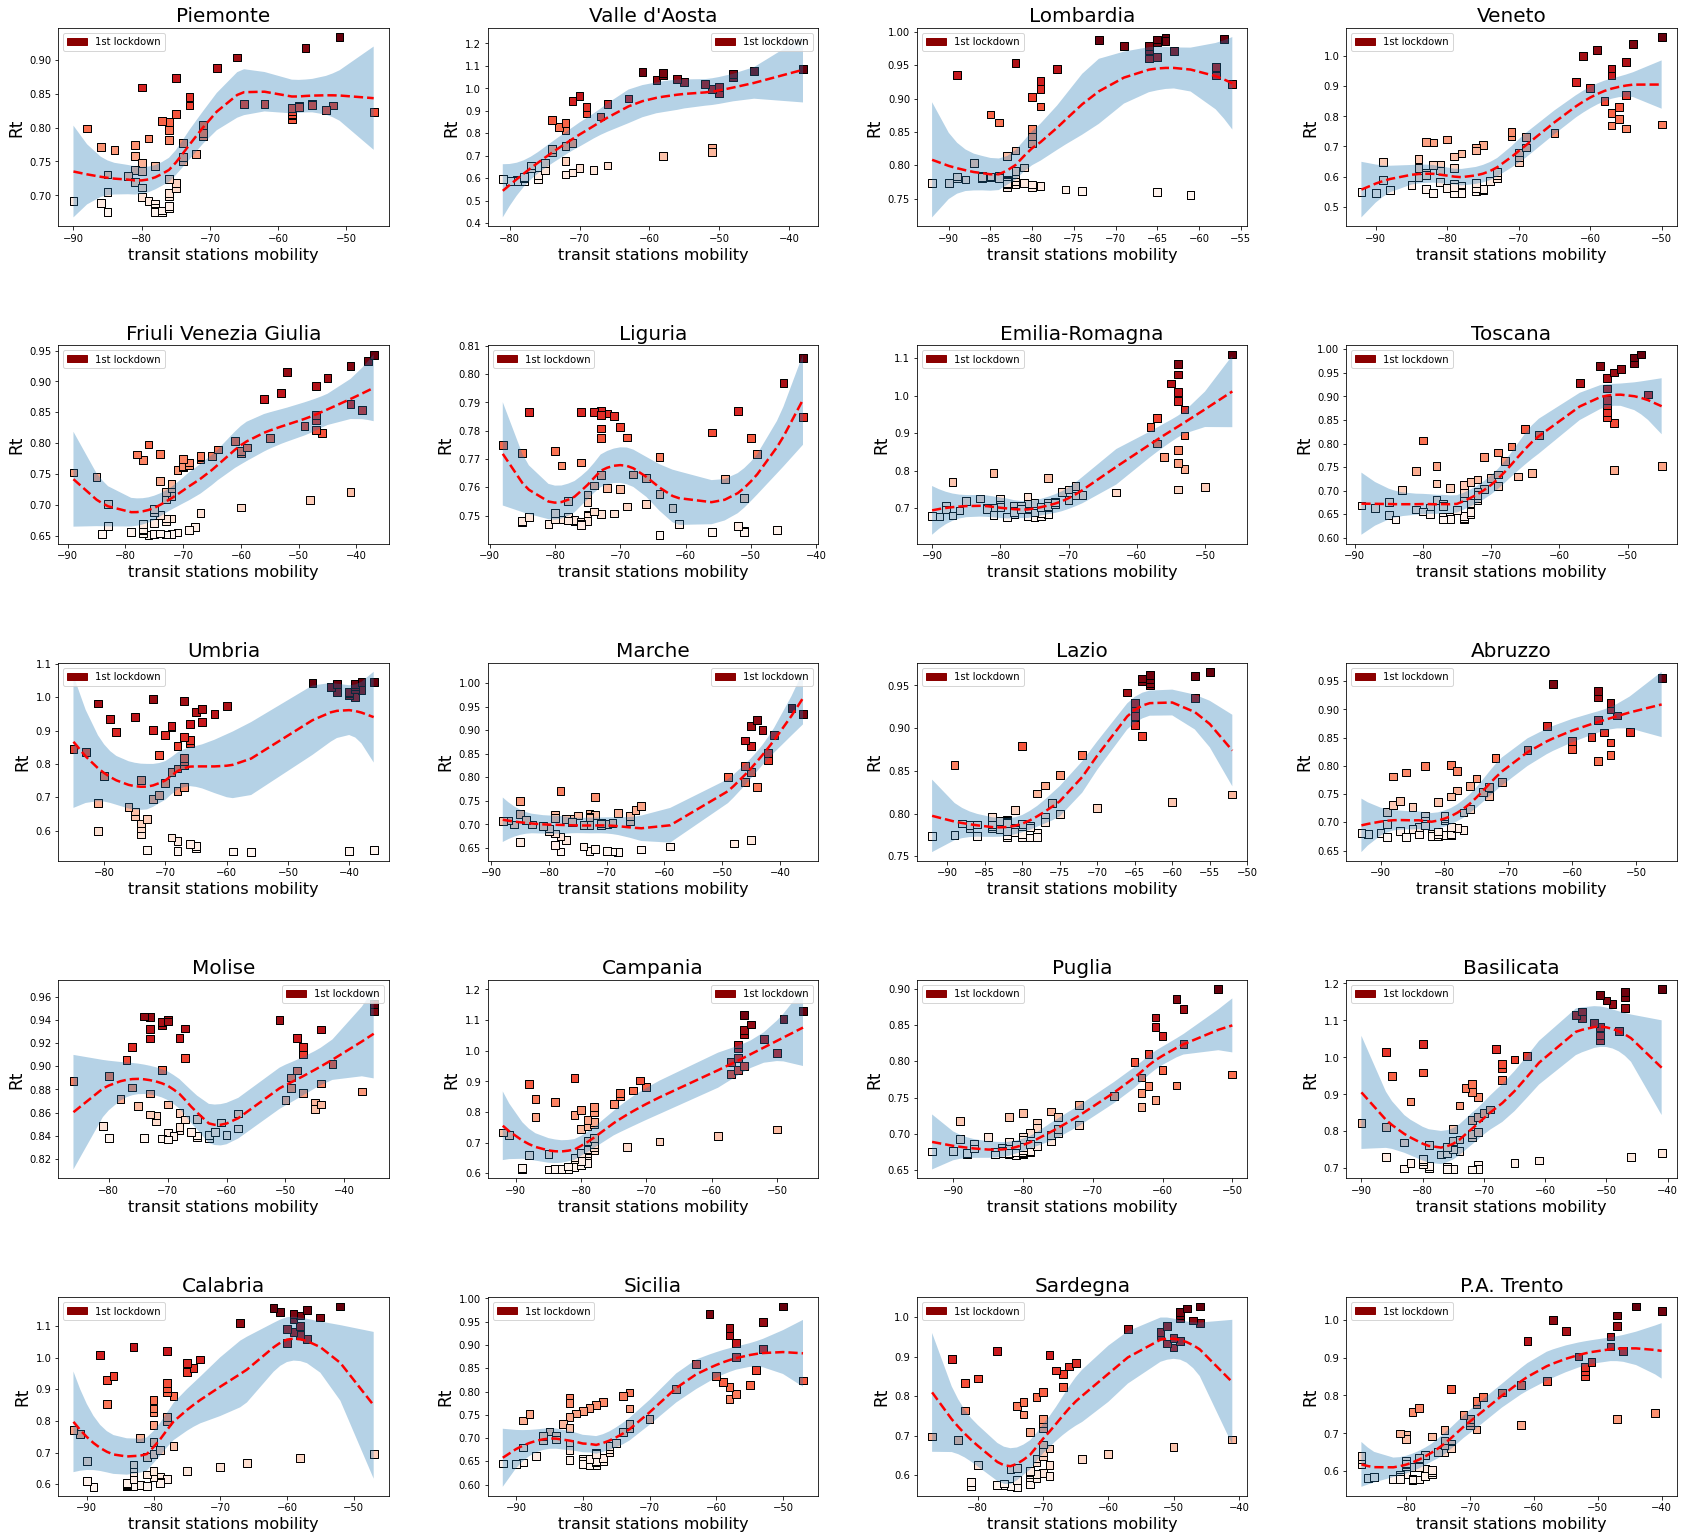

In [31]:
fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
for b,i in enumerate(regions_list):
    reg_mob = df_m[df_m['sub_region_1']==i] 
    reg_Rt = df[df['denominazione_regione']==i] 
    reg_Rt = reg_Rt[reg_Rt['data'].between('2020-03-01','2021-01-15')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2021-01-15')] 

    idx1 = pd.Index(reg_Rt['data'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_Rt = reg_Rt[reg_Rt.data != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_Rt = reg_Rt.reset_index()
    reg_mob = reg_mob.reset_index()
    
    Rt_startdate1 = '2020-03-25'
    Rt_enddate1 = '2020-06-02'
    reg_Rt1 = reg_Rt[reg_Rt['data'].between(Rt_startdate1,Rt_enddate1)]
    reg_Rt1 = reg_Rt1.reset_index()

    ndays_selected1 = len(reg_Rt1)

    dt_format_incstart1 = datetime.strptime(Rt_startdate1, '%Y-%m-%d')
    dt_format_regstart1 = dt_format_incstart1 - timedelta(days=15)
    reg_startdate1 = dt_format_regstart1.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate1)
    reg_startIndex1 = reg_mob.date[reg_mob.date == reg_startdate1].index[0]
    reg_endIndex1 = reg_startIndex1 + ndays_selected1

    reg_mob1 = reg_mob.iloc[reg_startIndex1:reg_endIndex1, :]
    reg_mob1.reset_index()
    
    
    x1 = reg_mob1['transit_stations_percent_change_from_baseline']
    y1 = reg_Rt1['mean']
    
    # loess fit
    x, y = zip(*sorted(zip(list(x1), list(y1))))
    
    l = loess(x,y)
    l.fit()
    pred = l.predict(x, stderror=True)
    conf = pred.confidence()

    lowess = pred.values
    ll = conf.lower
    ul = conf.upper

    #axs[b].plot(x, y, '+')
    axs[b].plot(x, lowess,'--',linewidth=2.5,color='red',zorder=2)
    axs[b].fill_between(x,ll,ul,alpha=.33,zorder=2)
    
    
    axs[b].scatter(x1,y1,s=60,c=y1,marker="s",edgecolor='black', linewidth=1,cmap='Reds',label='1st lockdown')
    axs[b].set_xlabel('transit stations mobility',size=16)
    axs[b].set_ylabel('Rt',size=17)
    axs[b].set_title(i,size=20) 
    axs[b].legend(loc=0,scatterpoints=1,facecolor = None) 
    #leg = axs[b].get_legend()
    pop_a = mpatches.Patch(color='darkred', label='1st lockdown')
    axs[b].legend(handles=[pop_a])
    #leg.legendHandles[0].set_color('red')
    #leg.legendHandles[1].set_color('yellow')
    

2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18


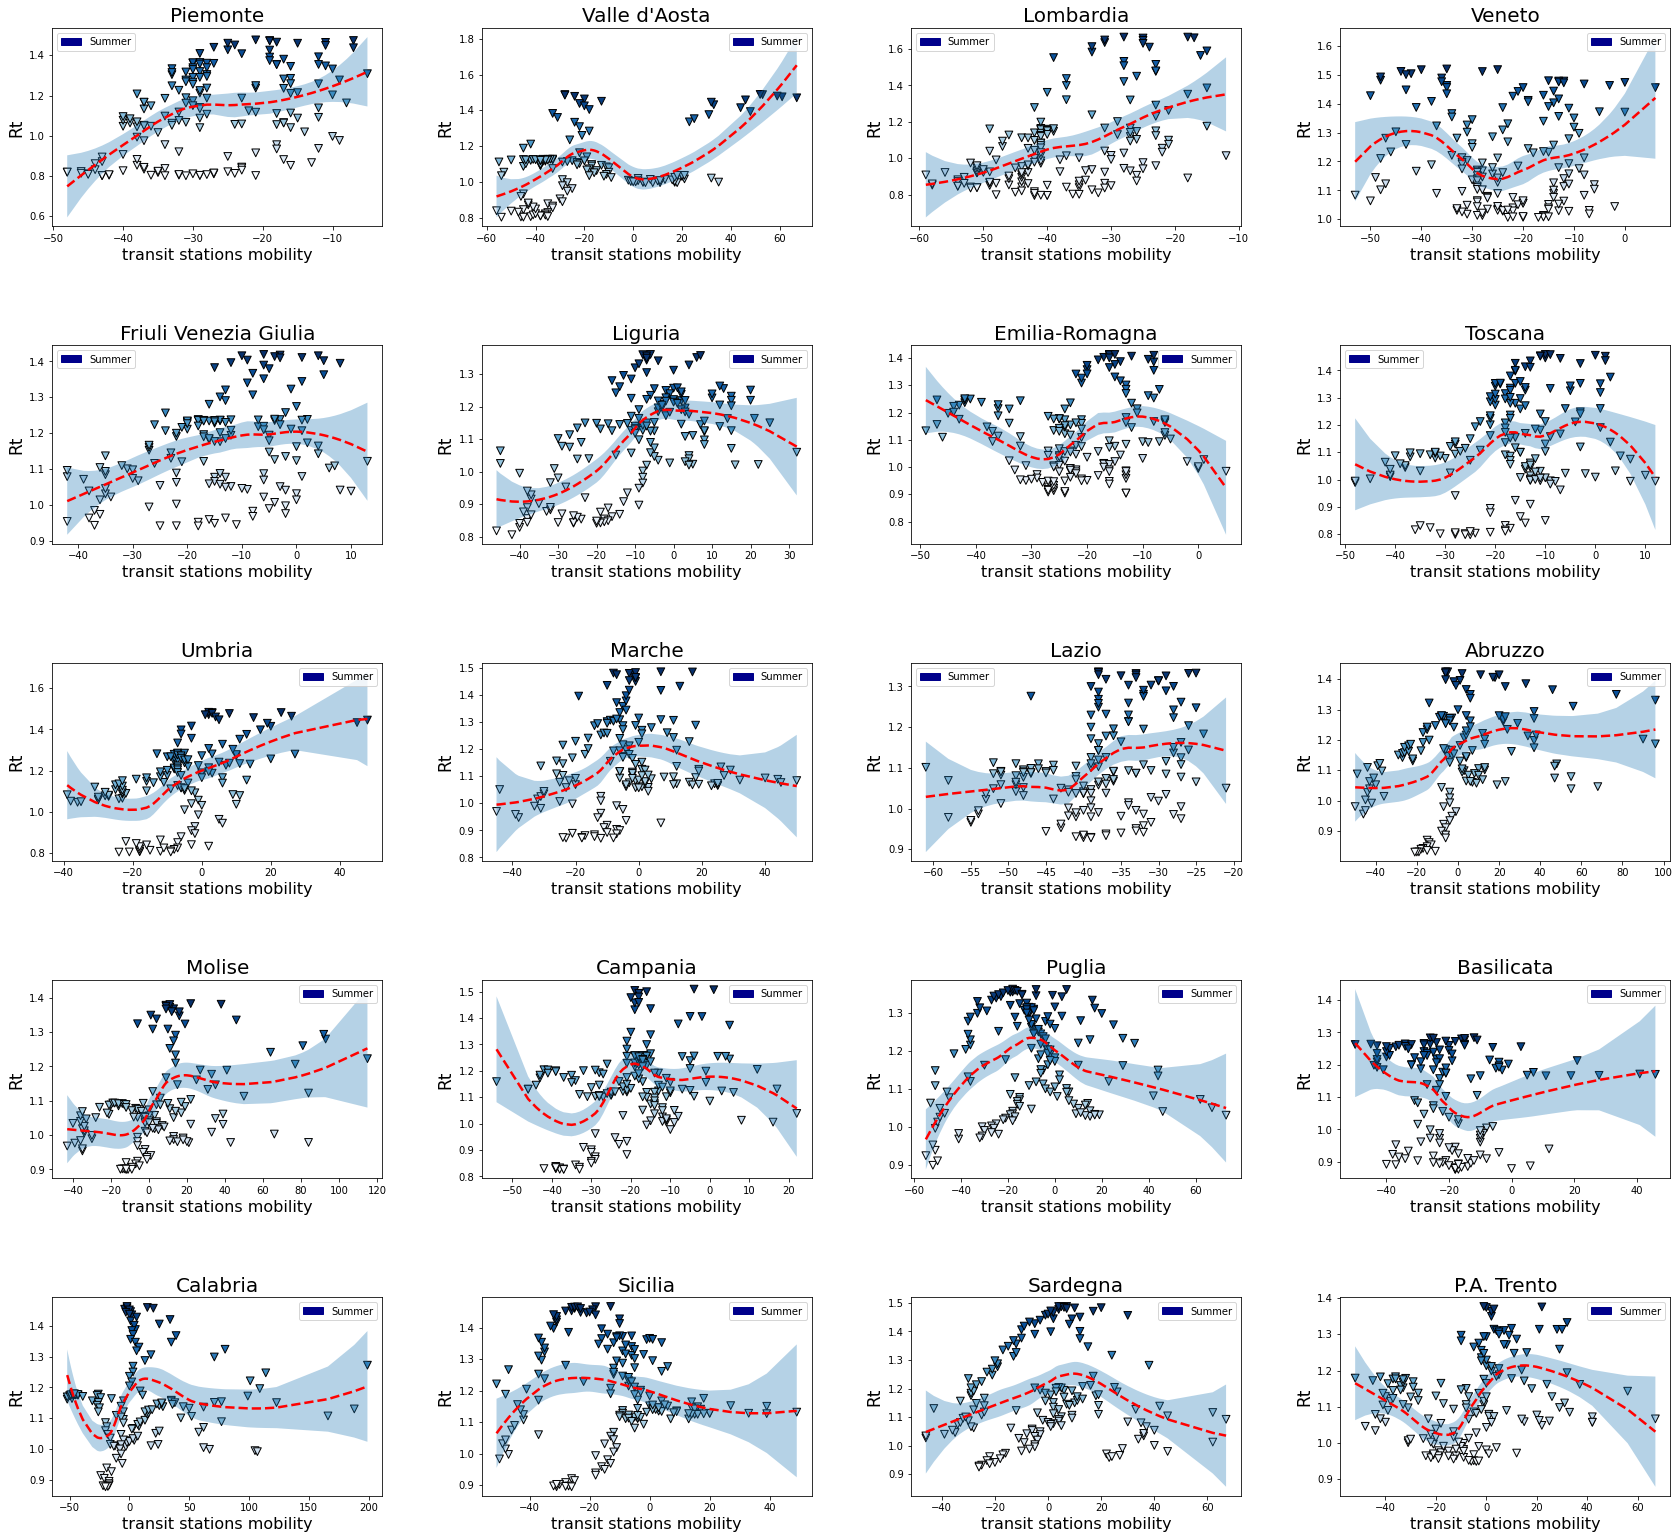

In [32]:
fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
for b,i in enumerate(regions_list):
    reg_mob = df_m[df_m['sub_region_1']==i] 
    reg_Rt = df[df['denominazione_regione']==i] 
    reg_Rt = reg_Rt[reg_Rt['data'].between('2020-03-01','2021-01-15')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2021-01-15')] 

    idx1 = pd.Index(reg_Rt['data'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_Rt = reg_Rt[reg_Rt.data != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_Rt = reg_Rt.reset_index()
    reg_mob = reg_mob.reset_index()
    
    Rt_startdate2 = '2020-06-02'
    Rt_enddate2 = '2020-11-18'
    reg_Rt2 = reg_Rt[reg_Rt['data'].between(Rt_startdate2,Rt_enddate2)]
    reg_Rt2 = reg_Rt2.reset_index()

    ndays_selected2 = len(reg_Rt2)

    dt_format_incstaRt2 = datetime.strptime(Rt_startdate2, '%Y-%m-%d')
    dt_format_regstaRt2 = dt_format_incstaRt2 - timedelta(days=15)
    reg_startdate2 = dt_format_regstaRt2.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate2)
    reg_startIndex2 = reg_mob.date[reg_mob.date == reg_startdate2].index[0]
    reg_endIndex2 = reg_startIndex2 + ndays_selected2

    reg_mob2 = reg_mob.iloc[reg_startIndex2:reg_endIndex2, :]
    reg_mob2.reset_index()
   
    x2 = reg_mob2['transit_stations_percent_change_from_baseline']
    y2 = reg_Rt2['mean']
    
    # loess fit
    x, y = zip(*sorted(zip(list(x2), list(y2))))
    
    l = loess(x,y)
    l.fit()
    pred = l.predict(x, stderror=True)
    conf = pred.confidence()

    lowess = pred.values
    ll = conf.lower
    ul = conf.upper

    #axs[b].plot(x, y, '+')
    axs[b].plot(x, lowess,'--',linewidth=2.5,color='red',zorder=2)
    axs[b].fill_between(x,ll,ul,alpha=.33,zorder=2)
    
    axs[b].scatter(x2,y2,s=60,c=y2,marker="v",edgecolor='black', linewidth=1,cmap='Blues',label='summer')
    axs[b].set_xlabel('transit stations mobility',size=16)
    axs[b].set_ylabel('Rt',size=17)
    axs[b].set_title(i,size=20) 
    axs[b].legend(loc=0,scatterpoints=1,facecolor = None) 
    #leg = axs[b].get_legend()
    pop_b = mpatches.Patch(color='darkblue', label='Summer')
    axs[b].legend(handles=[pop_b])
    #leg.legendHandles[0].set_color('red')
    #leg.legendHandles[1].set_color('yellow')  

2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03


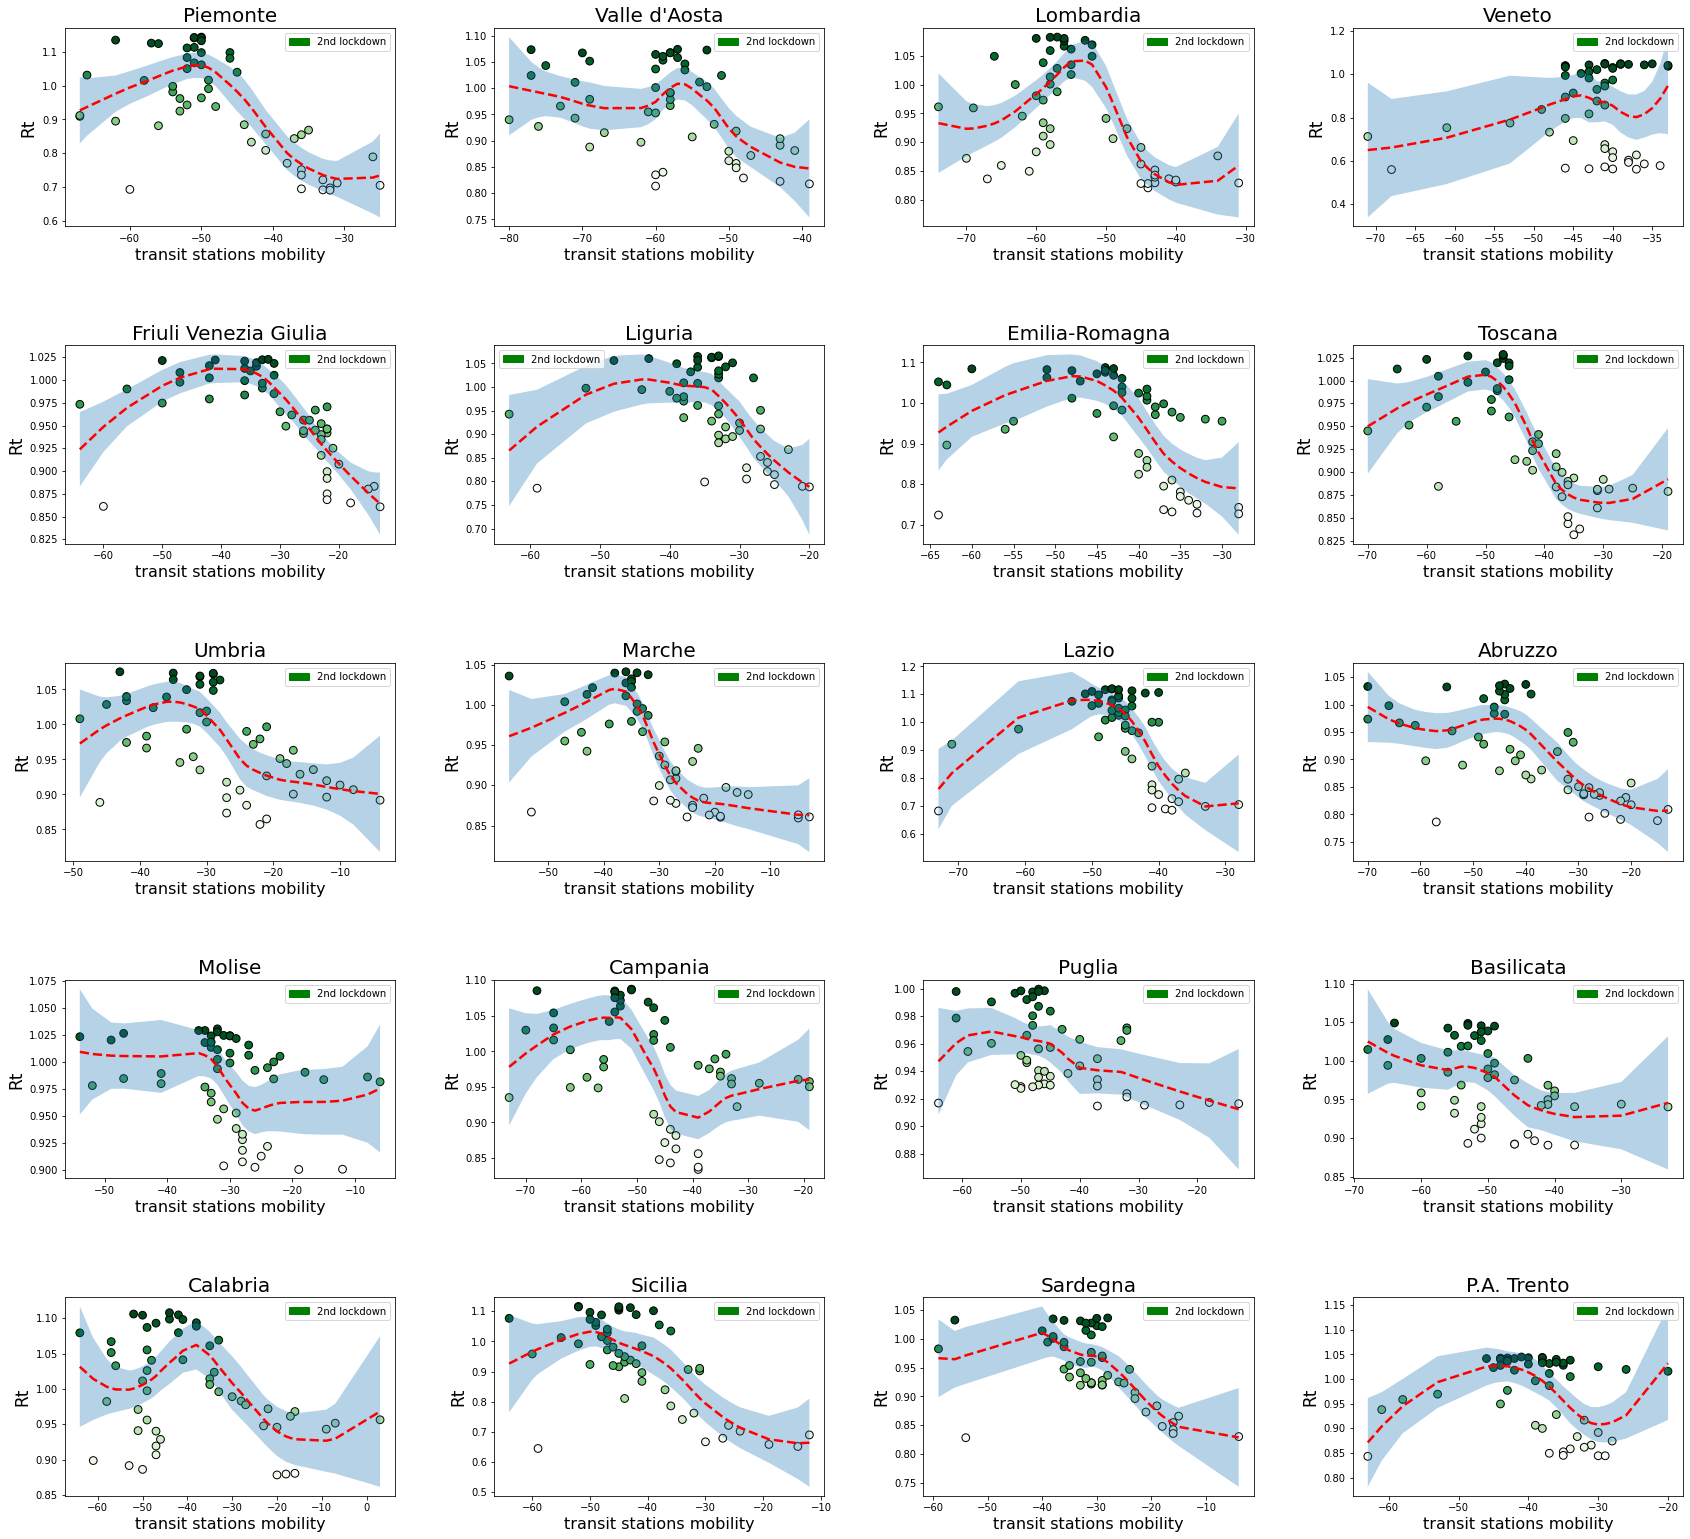

In [33]:
fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
for b,i in enumerate(regions_list):
    reg_mob = df_m[df_m['sub_region_1']==i] 
    reg_Rt = df[df['denominazione_regione']==i] 
    reg_Rt = reg_Rt[reg_Rt['data'].between('2020-03-01','2021-01-15')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2021-01-15')] 

    idx1 = pd.Index(reg_Rt['data'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_Rt = reg_Rt[reg_Rt.data != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_Rt = reg_Rt.reset_index()
    reg_mob = reg_mob.reset_index()
    
    Rt_startdate3 = '2020-11-18'
    Rt_enddate3 = '2021-01-09'
    reg_Rt3= reg_Rt[reg_Rt['data'].between(Rt_startdate3,Rt_enddate3)]
    reg_Rt3= reg_Rt3.reset_index()

    ndays_selected3 = len(reg_Rt3)

    dt_format_incstaRt3= datetime.strptime(Rt_startdate3, '%Y-%m-%d')
    dt_format_regstaRt3= dt_format_incstaRt3- timedelta(days=15)
    reg_startdate3 = dt_format_regstaRt3.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate3)
    reg_startIndex3 = reg_mob.date[reg_mob.date == reg_startdate3].index[0]
    reg_endIndex3 = reg_startIndex3 + ndays_selected3

    reg_mob3 = reg_mob.iloc[reg_startIndex3:reg_endIndex3, :]
    reg_mob3.reset_index()
    
    x3 = reg_mob3['transit_stations_percent_change_from_baseline']
    y3 = reg_Rt3['mean']
    
    # loess fit
    x, y = zip(*sorted(zip(list(x3), list(y3))))
    
    l = loess(x,y)
    l.fit()
    pred = l.predict(x, stderror=True)
    conf = pred.confidence()

    lowess = pred.values
    ll = conf.lower
    ul = conf.upper

    #axs[b].plot(x, y, '+')
    axs[b].plot(x, lowess,'--',linewidth=2.5,color='red',zorder=2)
    axs[b].fill_between(x,ll,ul,alpha=.33,zorder=2)
    

    axs[b].scatter(x3,y3,s=60,c=y3,marker="o",edgecolor='black', linewidth=1,cmap='Greens',label='2nd lockdown')
    axs[b].set_xlabel('transit stations mobility',size=16)
    axs[b].set_ylabel('Rt',size=17)
    axs[b].set_title(i,size=20) 
    axs[b].legend(loc=0,scatterpoints=1,facecolor = None) 
    #leg = axs[b].get_legend()
    pop_c = mpatches.Patch(color='green', label='2nd lockdown')
    axs[b].legend(handles=[pop_c])
    #leg.legendHandles[0].set_color('red')
    #leg.legendHandles[1].set_color('yellow')
    

### NON Shifted scatter (separate periods)

2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10
2020-03-10


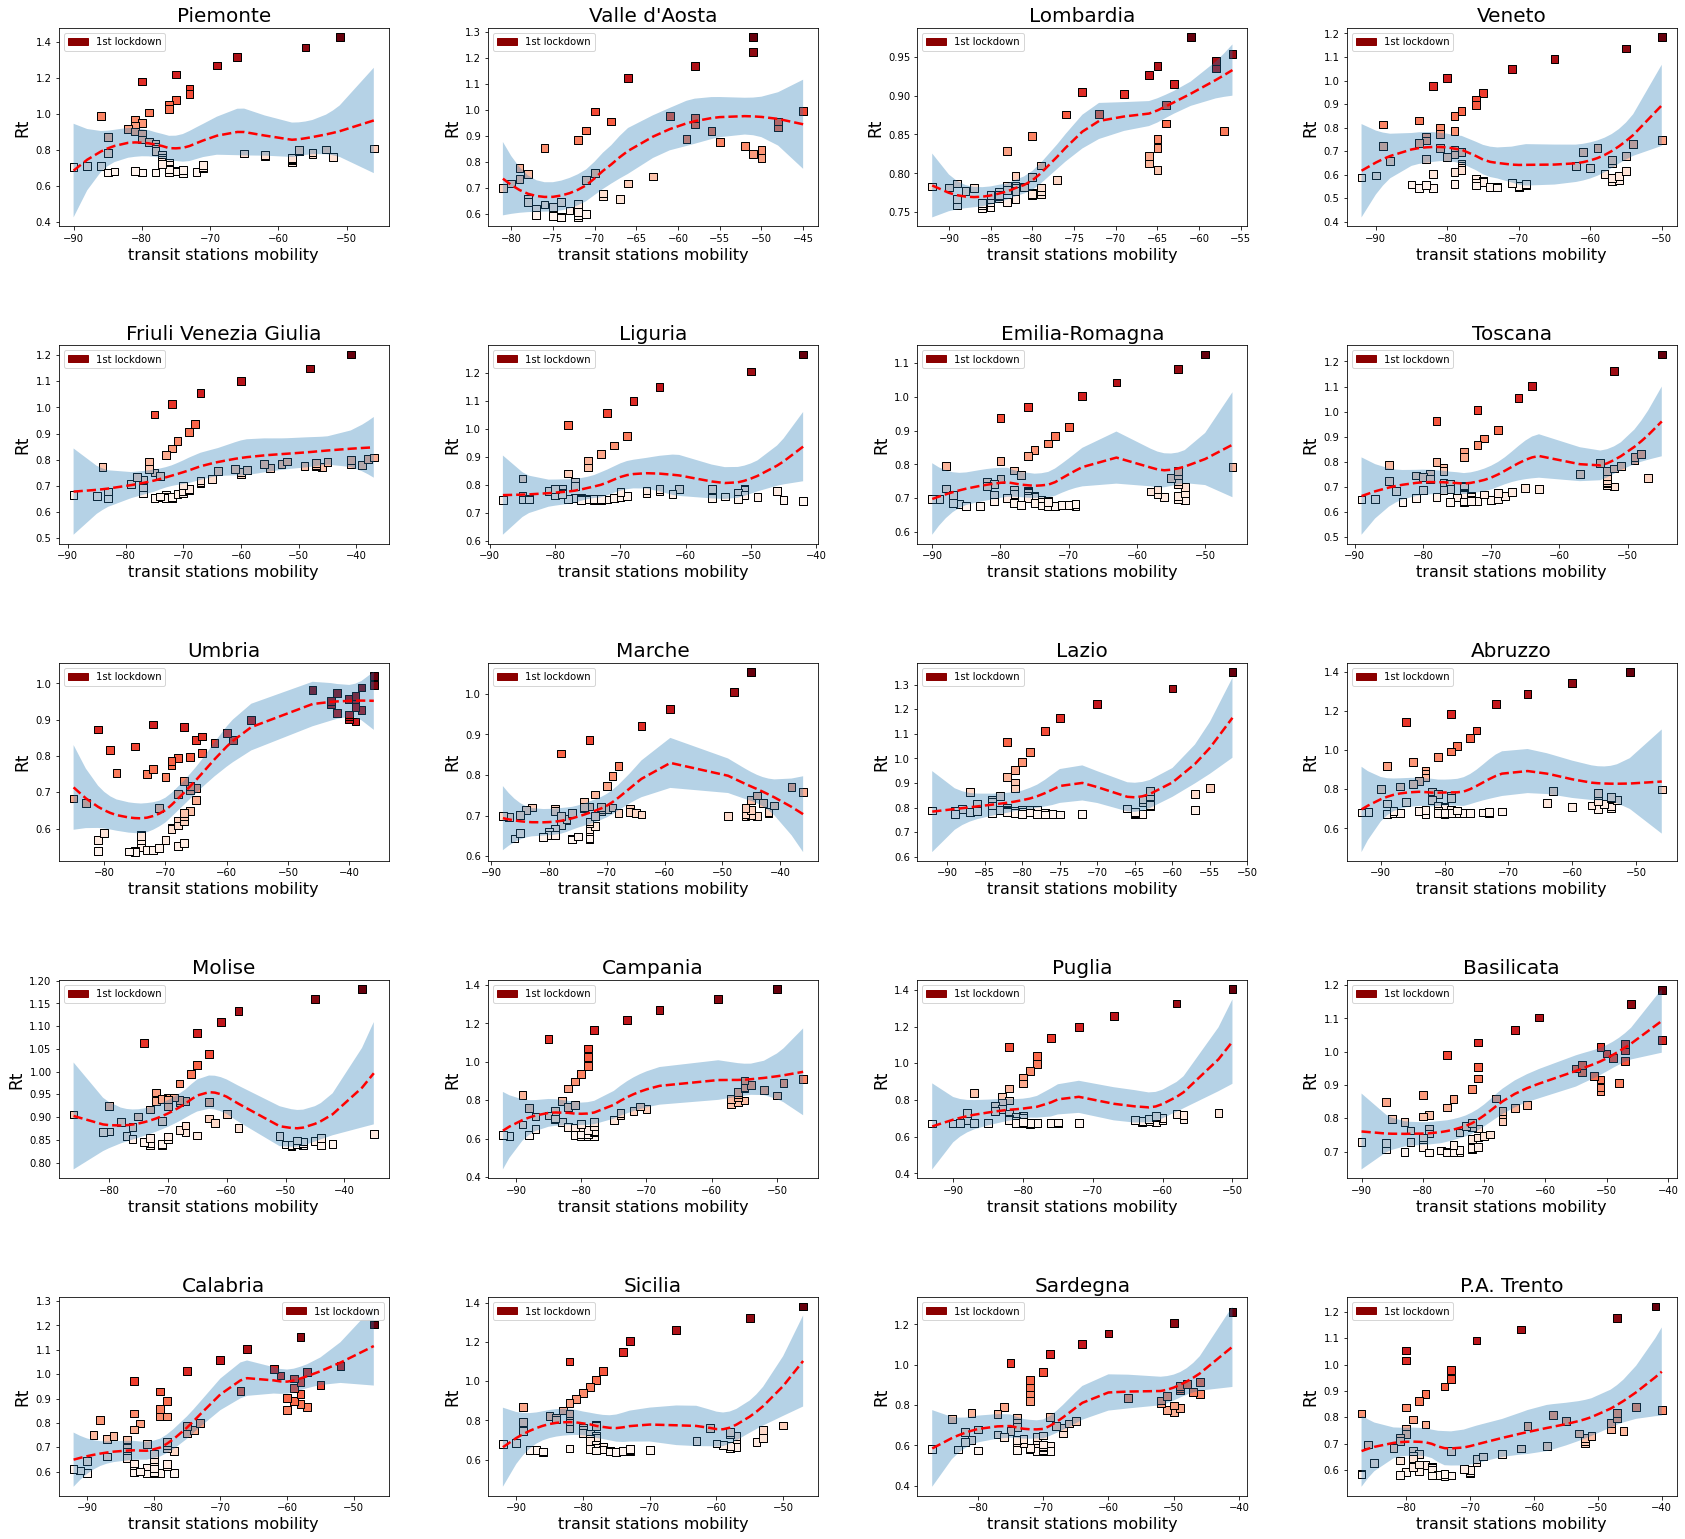

In [34]:
fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
for b,i in enumerate(regions_list):
    reg_mob = df_m[df_m['sub_region_1']==i] 
    reg_Rt = df[df['denominazione_regione']==i] 
    reg_Rt = reg_Rt[reg_Rt['data'].between('2020-03-01','2021-01-15')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2021-01-15')] 

    idx1 = pd.Index(reg_Rt['data'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_Rt = reg_Rt[reg_Rt.data != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_Rt = reg_Rt.reset_index()
    reg_mob = reg_mob.reset_index()
    
    Rt_startdate1 = '2020-03-10'
    Rt_enddate1 = '2020-05-18'
    reg_Rt1 = reg_Rt[reg_Rt['data'].between(Rt_startdate1,Rt_enddate1)]
    reg_Rt1 = reg_Rt1.reset_index()

    ndays_selected1 = len(reg_Rt1)

    dt_format_incstart1 = datetime.strptime(Rt_startdate1, '%Y-%m-%d')
    dt_format_regstart1 = dt_format_incstart1 - timedelta(days=0)
    reg_startdate1 = dt_format_regstart1.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate1)
    reg_startIndex1 = reg_mob.date[reg_mob.date == reg_startdate1].index[0]
    reg_endIndex1 = reg_startIndex1 + ndays_selected1

    reg_mob1 = reg_mob.iloc[reg_startIndex1:reg_endIndex1, :]
    reg_mob1.reset_index()
    
    x1 = reg_mob1['transit_stations_percent_change_from_baseline']
    y1 = reg_Rt1['mean']
    
    # loess fit
    x, y = zip(*sorted(zip(list(x1), list(y1))))
    
    l = loess(x,y)
    l.fit()
    pred = l.predict(x, stderror=True)
    conf = pred.confidence()

    lowess = pred.values
    ll = conf.lower
    ul = conf.upper

    #axs[b].plot(x, y, '+')
    axs[b].plot(x, lowess,'--',linewidth=2.5,color='red',zorder=2)
    axs[b].fill_between(x,ll,ul,alpha=.33,zorder=2)
    
   
    axs[b].scatter(x1,y1,s=60,c=y1,marker="s",edgecolor='black', linewidth=1,cmap='Reds',label='1st lockdown')
    axs[b].set_xlabel('transit stations mobility',size=16)
    axs[b].set_ylabel('Rt',size=17)
    axs[b].set_title(i,size=20) 
    axs[b].legend(loc=0,scatterpoints=1,facecolor = None) 
    #leg = axs[b].get_legend()
    pop_a = mpatches.Patch(color='darkred', label='1st lockdown')
    axs[b].legend(handles=[pop_a])
    #leg.legendHandles[0].set_color('red')
    #leg.legendHandles[1].set_color('yellow')
    

2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18
2020-05-18


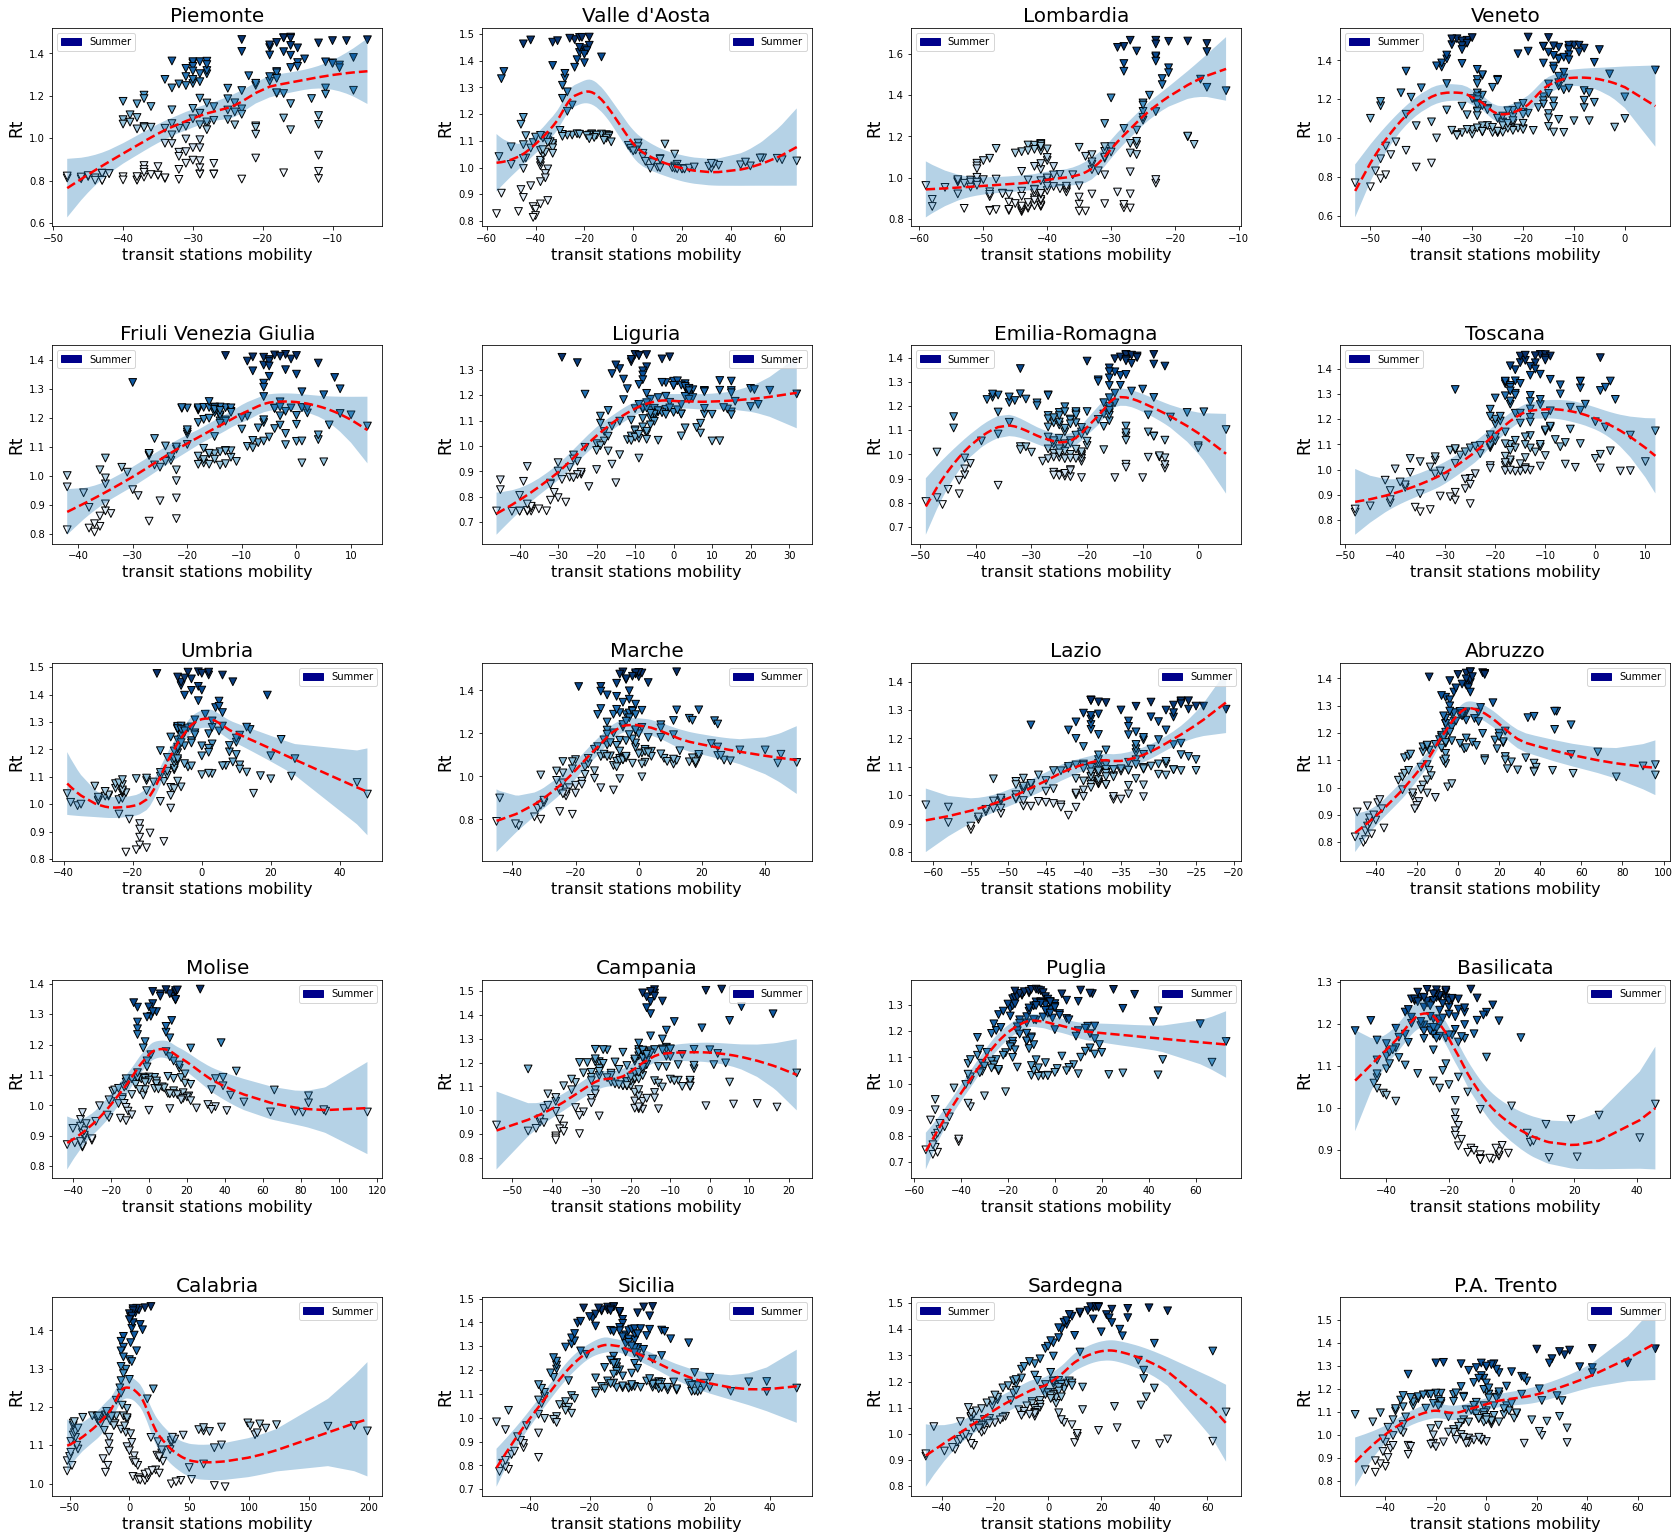

In [35]:
fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
for b,i in enumerate(regions_list):
    reg_mob = df_m[df_m['sub_region_1']==i] 
    reg_Rt = df[df['denominazione_regione']==i] 
    reg_Rt = reg_Rt[reg_Rt['data'].between('2020-03-01','2021-01-15')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2021-01-15')] 

    idx1 = pd.Index(reg_Rt['data'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_Rt = reg_Rt[reg_Rt.data != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_Rt = reg_Rt.reset_index()
    reg_mob = reg_mob.reset_index()

    Rt_startdate2 = '2020-05-18'
    Rt_enddate2 = '2020-11-03'
    reg_Rt2 = reg_Rt[reg_Rt['data'].between(Rt_startdate2,Rt_enddate2)]
    reg_Rt2 = reg_Rt2.reset_index()

    ndays_selected2 = len(reg_Rt2)

    dt_format_incstaRt2 = datetime.strptime(Rt_startdate2, '%Y-%m-%d')
    dt_format_regstaRt2 = dt_format_incstaRt2 - timedelta(days=0)
    reg_startdate2 = dt_format_regstaRt2.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate2)
    reg_startIndex2 = reg_mob.date[reg_mob.date == reg_startdate2].index[0]
    reg_endIndex2 = reg_startIndex2 + ndays_selected2

    reg_mob2 = reg_mob.iloc[reg_startIndex2:reg_endIndex2, :]
    reg_mob2.reset_index()
    
    
    x2 = reg_mob2['transit_stations_percent_change_from_baseline']
    y2 = reg_Rt2['mean']
    
    # loess fit
    x, y = zip(*sorted(zip(list(x2), list(y2))))
    
    l = loess(x,y)
    l.fit()
    pred = l.predict(x, stderror=True)
    conf = pred.confidence()

    lowess = pred.values
    ll = conf.lower
    ul = conf.upper

    #axs[b].plot(x, y, '+')
    axs[b].plot(x, lowess,'--',linewidth=2.5,color='red',zorder=2)
    axs[b].fill_between(x,ll,ul,alpha=.33,zorder=2)
    

    axs[b].scatter(x2,y2,s=60,c=y2,marker="v",edgecolor='black', linewidth=1,cmap='Blues',label='summer')
    axs[b].set_xlabel('transit stations mobility',size=16)
    axs[b].set_ylabel('Rt',size=17)
    axs[b].set_title(i,size=20) 
    axs[b].legend(loc=0,scatterpoints=1,facecolor = None) 
    #leg = axs[b].get_legend()
    pop_b = mpatches.Patch(color='darkblue', label='Summer')
    axs[b].legend(handles=[pop_b])
    #leg.legendHandles[0].set_color('red')
    #leg.legendHandles[1].set_color('yellow')
    

2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03
2020-11-03


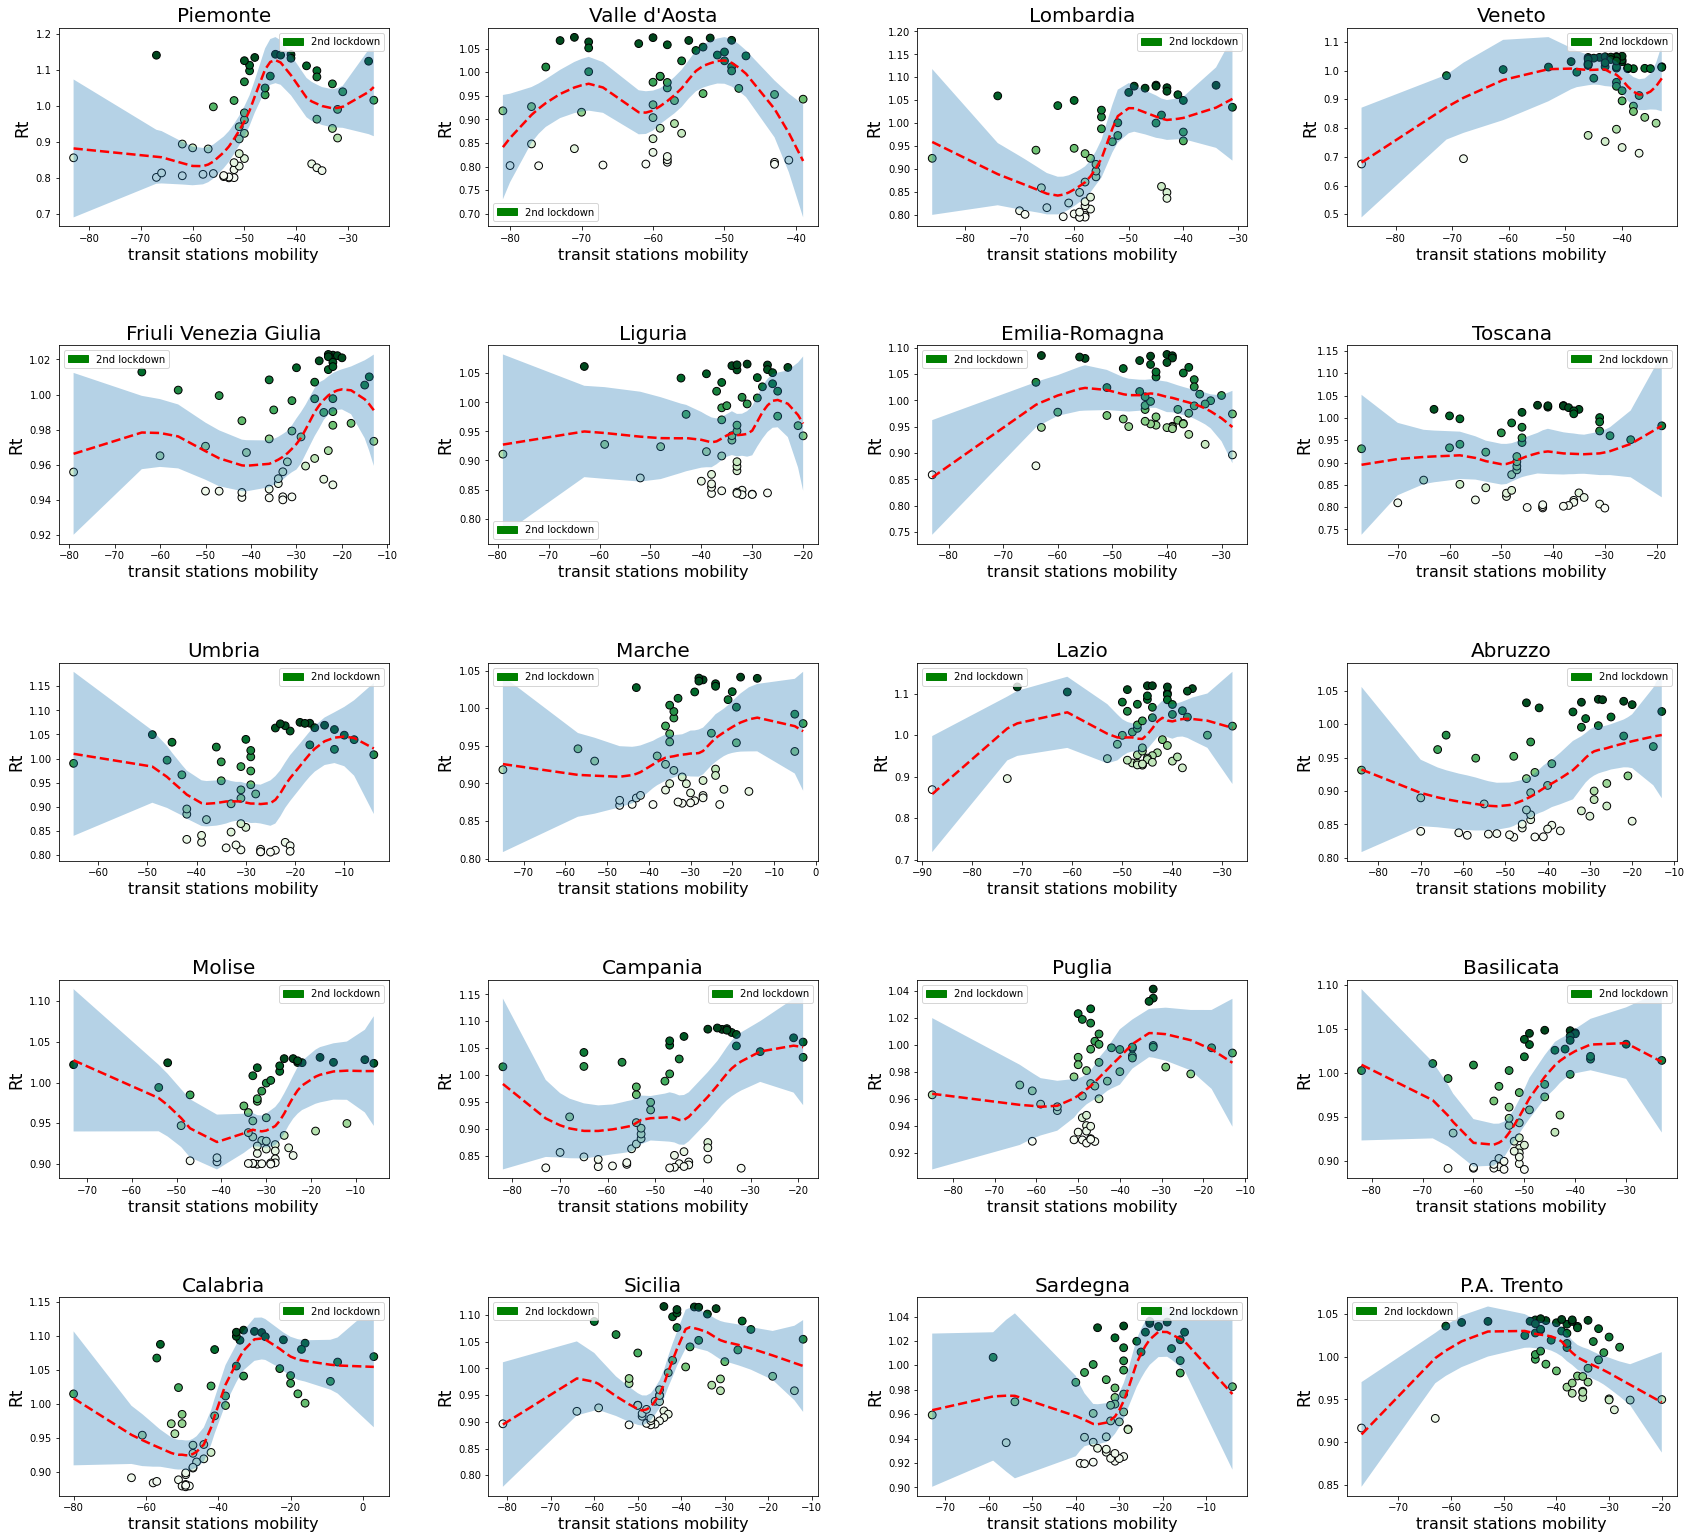

In [36]:
fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
for b,i in enumerate(regions_list):
    reg_mob = df_m[df_m['sub_region_1']==i] 
    reg_Rt = df[df['denominazione_regione']==i] 
    reg_Rt = reg_Rt[reg_Rt['data'].between('2020-03-01','2021-01-15')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2021-01-15')] 

    idx1 = pd.Index(reg_Rt['data'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_Rt = reg_Rt[reg_Rt.data != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_Rt = reg_Rt.reset_index()
    reg_mob = reg_mob.reset_index()
    
    Rt_startdate3 = '2020-11-03'
    Rt_enddate3 = '2020-12-25'
    reg_Rt3= reg_Rt[reg_Rt['data'].between(Rt_startdate3,Rt_enddate3)]
    reg_Rt3= reg_Rt3.reset_index()

    ndays_selected3 = len(reg_Rt3)

    dt_format_incstaRt3= datetime.strptime(Rt_startdate3, '%Y-%m-%d')
    dt_format_regstaRt3= dt_format_incstaRt3- timedelta(days=0)
    reg_startdate3 = dt_format_regstaRt3.strftime("%Y-%m-%d") # get it in string
    print(reg_startdate3)
    reg_startIndex3 = reg_mob.date[reg_mob.date == reg_startdate3].index[0]
    reg_endIndex3 = reg_startIndex3 + ndays_selected3

    reg_mob3 = reg_mob.iloc[reg_startIndex3:reg_endIndex3, :]
    reg_mob3.reset_index()
    
    x3 = reg_mob3['transit_stations_percent_change_from_baseline']
    y3 = reg_Rt3['mean']
    
    # loess fit
    x, y = zip(*sorted(zip(list(x3), list(y3))))
    
    l = loess(x,y)
    l.fit()
    pred = l.predict(x, stderror=True)
    conf = pred.confidence()

    lowess = pred.values
    ll = conf.lower
    ul = conf.upper

    #axs[b].plot(x, y, '+')
    axs[b].plot(x, lowess,'--',linewidth=2.5,color='red',zorder=2)
    axs[b].fill_between(x,ll,ul,alpha=.33,zorder=2)
    

    axs[b].scatter(x3,y3,s=60,c=y3,marker="o",edgecolor='black', linewidth=1,cmap='Greens',label='2nd lockdown')
    axs[b].set_xlabel('transit stations mobility',size=16)
    axs[b].set_ylabel('Rt',size=17)
    axs[b].set_title(i,size=20) 
    axs[b].legend(loc=0,scatterpoints=1,facecolor = None) 
    #leg = axs[b].get_legend()
    pop_c = mpatches.Patch(color='green', label='2nd lockdown')
    axs[b].legend(handles=[pop_c])
    #leg.legendHandles[0].set_color('red')
    #leg.legendHandles[1].set_color('yellow')
    